# Robustness Checks

Load required modules

In [ ]:
import pandas as pd
import numpy as np


Load the dataframe prepared for this purpose, and name the dataframe as 'robust'

In [2]:
robust = pd.read_csv('Downloads/robustness_alternative_2.csv')
robust['housing_cost'] = robust['income'] * robust['proportion_of_income_spent_on_housing_cost']

In [3]:
robust = robust.drop(['Unnamed: 0'], axis = 1)

In [4]:
robust

,income,incQ,dti,region,SOC_label,any_late,age_group,income quintile,tenure_label,proportion_of_income_spent_on_housing_cost,housing_cost
0,47387.57,8,0.235342,South West,Professional occupations,0,Aged 35 to 49 years,4,Renter,0.200311,9492.243875
1,66577.07,10,0.000000,East,"Managers, directors and senior officials",0,Aged 65 years and over,5,Own outright,0.000000,0.000000
2,33240.98,6,0.000000,South East,Professional occupations,0,Aged 50 to 64 years,3,Renter,0.225018,7479.822790
3,41529.33,7,0.036065,South West,Professional occupations,1,Aged 35 to 49 years,4,Own outright,0.000000,0.000000
4,56176.13,9,0.000000,South East,Professional occupations,0,Aged 25 to 34 years,5,Renter,0.207660,11665.517235
...,...,...,...,...,...,...,...,...,...,...,...
99995,32075.79,5,0.016850,South West,Skilled trades,1,Aged 35 to 49 years,3,Renter,0.228205,7319.855011
99996,44287.21,8,0.000000,London,Professional occupations,1,Aged 35 to 49 years,4,Renter,0.256636,11365.693323
99997,51767.80,9,0.000000,East,Professional occupations,0,Aged 50 to 64 years,5,Mortgage,0.132579,6863.340127
99998,16043.91,2,0.000000,Wales,Professional occupations,0,Aged 35 to 49 years,1,Own outright,0.000000,0.000000


Load the baseline data (2-way and 3-way tables from Office of National Statistics, Financial Conduct Authority and English Housing Survey)

In [5]:
breakdown_by_region_and_income_quintile = pd.read_csv('Downloads/regional.csv')
breakdown_by_income_and_SOC = pd.read_csv('Downloads/occupation x region.csv')
breakdown_by_region_and_SOC = pd.read_csv('Downloads/prior2.csv')
breakdown_by_region_and_SOC_and_age = pd.read_csv('Downloads/age_sample.csv')
breakdown_by_region_and_income_and_age = pd.read_csv('Downloads/age-income-region.csv')
breakdown_by_tenure_label_and_age = pd.read_csv('Downloads/mortgage x age.csv')
breakdown_by_tenure_label_and_income = pd.read_csv('Downloads/mortgage x income.csv')
breakdown_by_tenure_label_and_region = pd.read_csv('Downloads/mortgage x region.csv')
breakdown_by_tenure_label_and_region_and_housing_cost = pd.read_csv('Downloads/housing cost x region.csv')
breakdown_by_tenure_label_and_incQ_and_housing_cost = pd.read_csv('Downloads/housing cost x income_quintile.csv')
breakdown_by_region_and_dti = pd.read_csv('Downloads/region x debt-to-income.csv')
breakdown_by_tenure_label_and_dti = pd.read_csv('Downloads/mortgage x debt-to-income.csv')
breakdown_by_age_group_and_late_flag = pd.read_csv('Downloads/age group x late flag.csv')
breakdown_by_tenure_label_and_late_flag = pd.read_csv('Downloads/mortgage x late flag.csv')
breakdown_by_income_and_SOC = breakdown_by_income_and_SOC.set_index('SOC_code')

This is how one of the tables look like

In [6]:
breakdown_by_income_and_SOC

,North East,North West,Yorkshire & Humber,East Midlands,West Midlands,East,London,South East,South West,Wales
SOC_code,,,,,,,,,,
"Managers, directors and senior officials","51,336","56,087","53,097","52,415","55,981","60,488","110,577","61,240","51,541","46,035"
Professional occupations,"41,035","45,030","43,447","41,688","43,062","43,172","61,406","47,159","43,058","42,955"
Associate professional and technical,"34,908","36,246","34,200","34,551","40,705","37,478","48,530","39,792","32,798","32,726"
Administrative and secretarial,"23,253","25,730","24,563","23,458","24,575","24,058","30,962","24,983","23,921","25,177"
Skilled trades,"33,199","33,680","33,693","33,775","34,194","34,912","36,175","34,242","33,043","33,243"
"Caring, leisure and other services","19,960","20,265","19,704","19,162","19,409","20,248","23,487","20,037","20,197","19,411"
Sales and customer services,"18,290","18,866","18,458","17,932","18,228","18,073","21,064","18,256","16,815","18,204"
"Process, plant and machine operatives","30,809","30,618","31,888","30,450","30,884","32,545","36,774","31,658","31,215","30,175"
Elementary occupations,"18,000","18,598","18,863","19,217","18,511","18,706","19,868","18,210","18,278","17,863"


The code below plots marginal distributions for region, income quintile, SOC code, age group, tenure label, late flag for baseline and synthetic dataset side-by-side. 

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_61471/3829358169.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  breakdown_by_region_and_income_quintile = breakdown_by_region_and_income_quintile.applymap(
/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_61471/3829358169.py:41: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  breakdown_by_region_and_SOC = breakdown_by_region_and_SOC.applymap(


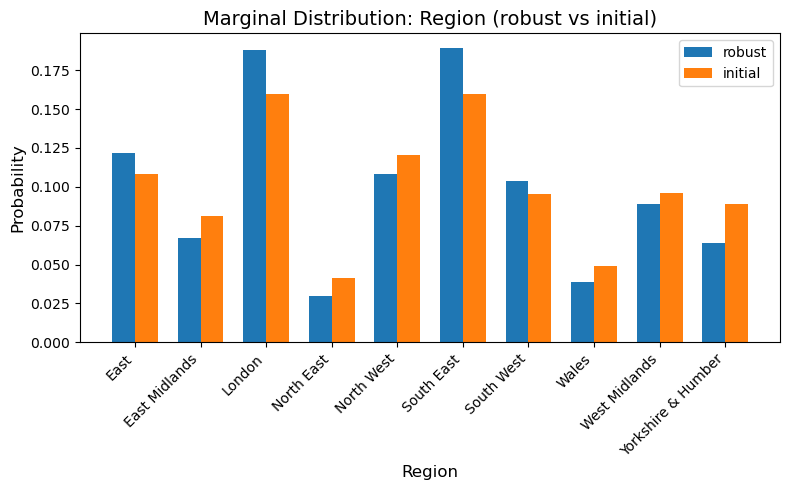

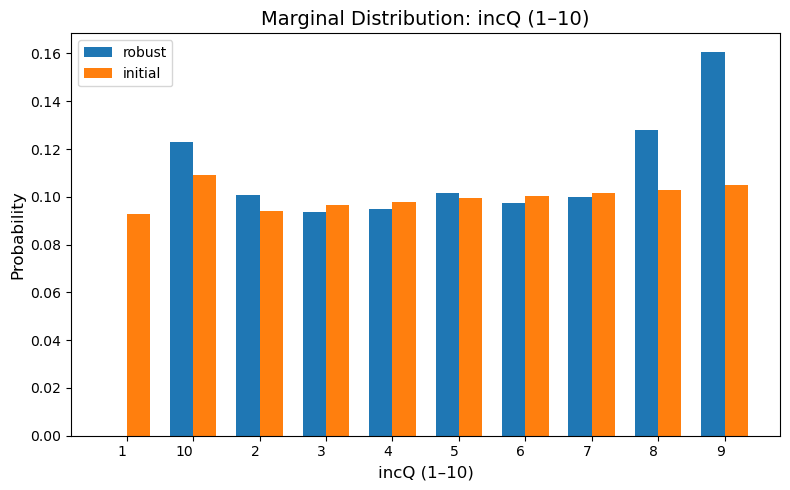

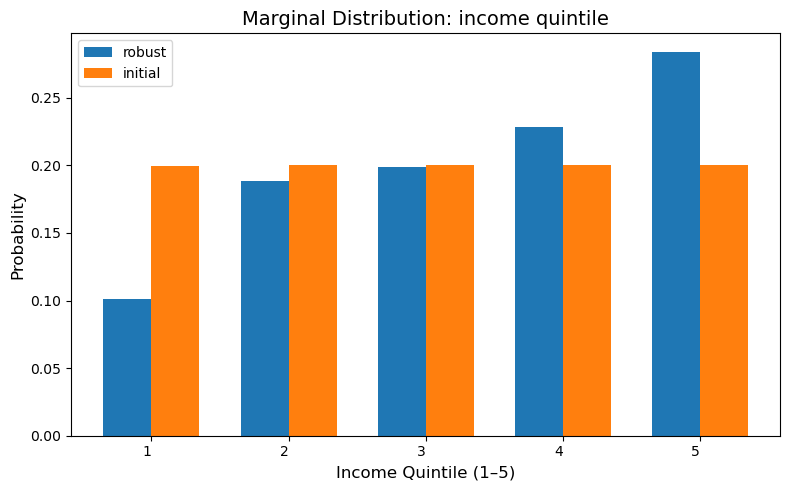

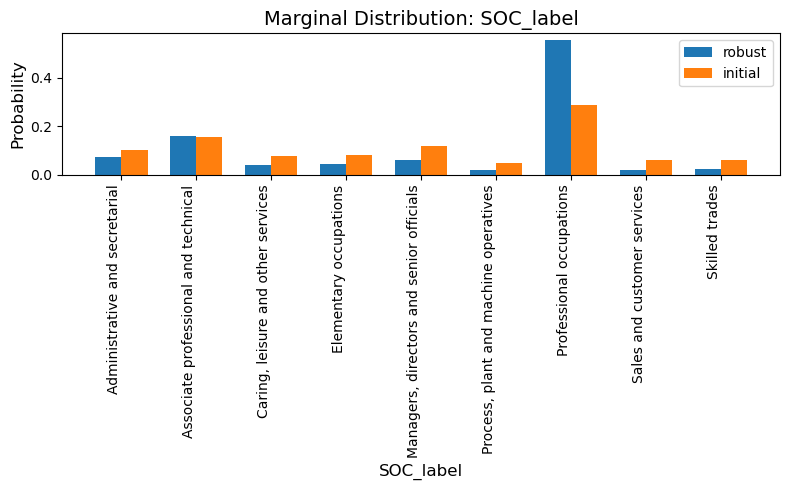

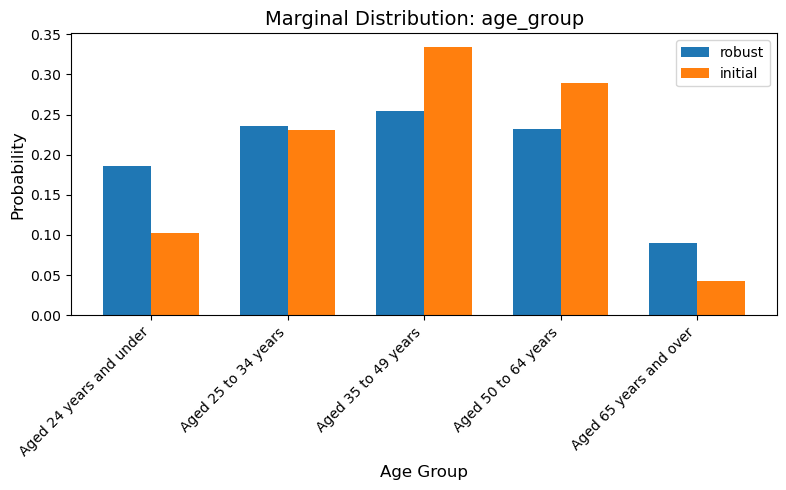

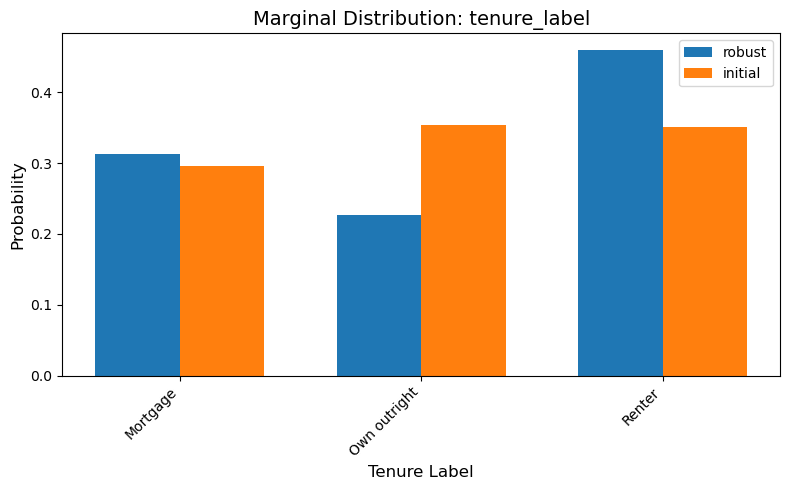

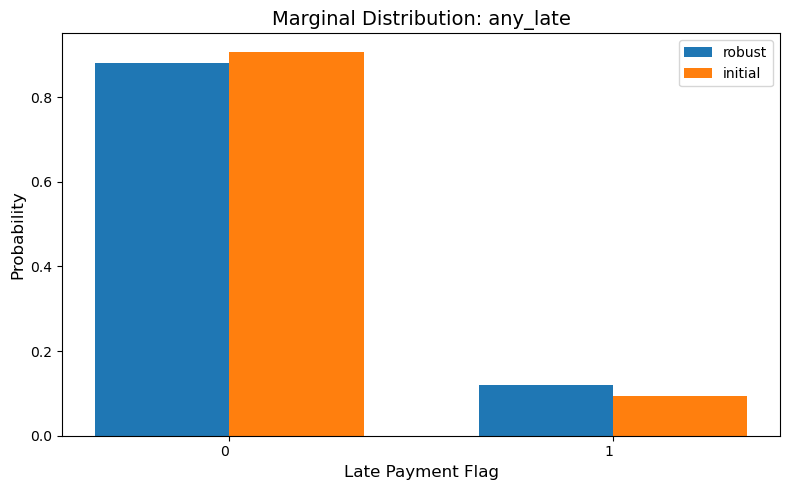

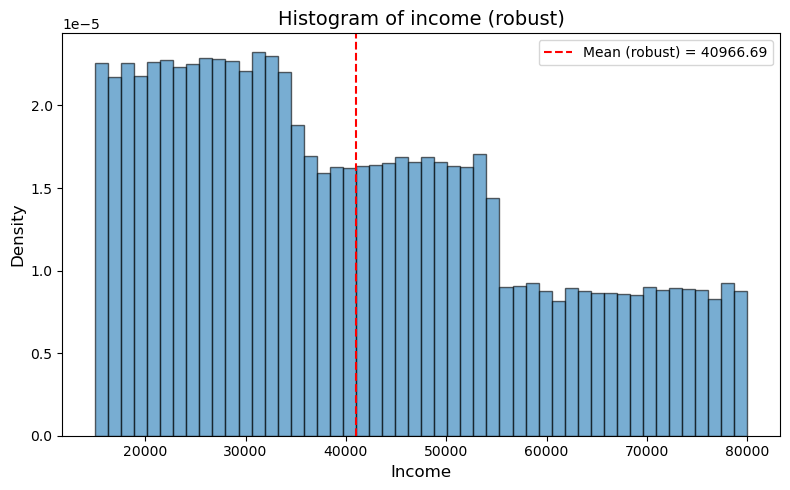

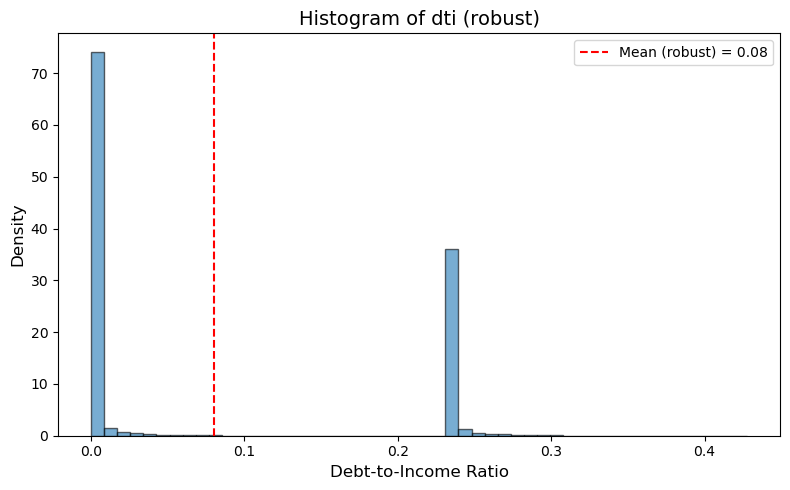

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# ─────────────────────────────────────────────────────────────────────────────
# 1) Helper to clean strings (remove commas, percent signs, whitespace) and convert to numeric
# ─────────────────────────────────────────────────────────────────────────────
def clean_and_numeric(series: pd.Series) -> pd.Series:
    """
    Convert a Series of potentially “dirty” strings (e.g. containing commas, '%', whitespace)
    into floats. Non‐convertible values become NaN.
    """
    # Step 1: Coerce everything to string
    s = series.astype(str)
    # Step 2: Remove commas and percent signs, then strip whitespace
    s = s.str.replace(',', '', regex=False).str.replace('%', '', regex=False).str.strip()
    # Step 3: Convert to numeric
    return pd.to_numeric(s, errors='coerce')


# ─────────────────────────────────────────────────────────────────────────────
# 2) Coerce every “initial” table’s numeric columns to real numerics
# ─────────────────────────────────────────────────────────────────────────────

# 2.a) breakdown_by_region_and_income_quintile (joint distribution: each cell = P(region, incQ) in %)
#    - Rows are regions, columns are incQ buckets (10, 9, …, 1).
#    - We will:
#      1) set 'group' as the index (region names),
#      2) apply clean_and_numeric to every cell,
#      3) normalize the entire table so that the sum of all cells = 1.
breakdown_by_region_and_income_quintile = breakdown_by_region_and_income_quintile.set_index('group')
breakdown_by_region_and_income_quintile = breakdown_by_region_and_income_quintile.applymap(
    lambda x: clean_and_numeric(pd.Series([x])).iloc[0]
)

# Now convert percentages → probabilities by dividing by the total sum of the table
joint_total = breakdown_by_region_and_income_quintile.values.sum()
joint_prob_table = breakdown_by_region_and_income_quintile / joint_total

# 2.b) breakdown_by_region_and_SOC (counts in every cell)
breakdown_by_region_and_SOC = breakdown_by_region_and_SOC.set_index('SOC_code')
breakdown_by_region_and_SOC = breakdown_by_region_and_SOC.applymap(
    lambda x: clean_and_numeric(pd.Series([x])).iloc[0]
)

# 2.c) breakdown_by_region_and_SOC_and_age: clean 'Observation'
breakdown_by_region_and_SOC_and_age['Observation'] = clean_and_numeric(
    breakdown_by_region_and_SOC_and_age['Observation']
)

# 2.d) breakdown_by_region_and_income_and_age: clean 'income' and 'Observation'
breakdown_by_region_and_income_and_age['income'] = clean_and_numeric(
    breakdown_by_region_and_income_and_age['income']
)
breakdown_by_region_and_income_and_age['Observation'] = clean_and_numeric(
    breakdown_by_region_and_income_and_age['Observation']
)

# 2.e) breakdown_by_tenure_label_and_age: clean 'frequency'
breakdown_by_tenure_label_and_age['frequency'] = clean_and_numeric(
    breakdown_by_tenure_label_and_age['frequency']
)

# 2.f) breakdown_by_tenure_label_and_income: clean 'frequency'
breakdown_by_tenure_label_and_income['frequency'] = clean_and_numeric(
    breakdown_by_tenure_label_and_income['frequency']
)

# 2.g) breakdown_by_tenure_label_and_region: clean 'frequency'
breakdown_by_tenure_label_and_region['frequency'] = clean_and_numeric(
    breakdown_by_tenure_label_and_region['frequency']
)

# 2.h) breakdown_by_tenure_label_and_region_and_housing_cost: clean 'prop_mean', 'frequency'
breakdown_by_tenure_label_and_region_and_housing_cost['prop_mean'] = clean_and_numeric(
    breakdown_by_tenure_label_and_region_and_housing_cost['prop_mean']
)
breakdown_by_tenure_label_and_region_and_housing_cost['frequency'] = clean_and_numeric(
    breakdown_by_tenure_label_and_region_and_housing_cost['frequency']
)

# 2.i) breakdown_by_tenure_label_and_incQ_and_housing_cost: clean 'prop_mean', 'frequency'
breakdown_by_tenure_label_and_incQ_and_housing_cost['prop_mean'] = clean_and_numeric(
    breakdown_by_tenure_label_and_incQ_and_housing_cost['prop_mean']
)
breakdown_by_tenure_label_and_incQ_and_housing_cost['frequency'] = clean_and_numeric(
    breakdown_by_tenure_label_and_incQ_and_housing_cost['frequency']
)

# 2.j) breakdown_by_region_and_dti: clean 'debt-to-income', 'Observation'
breakdown_by_region_and_dti['debt-to-income'] = clean_and_numeric(
    breakdown_by_region_and_dti['debt-to-income']
)
breakdown_by_region_and_dti['Observation'] = clean_and_numeric(
    breakdown_by_region_and_dti['Observation']
)

# 2.k) breakdown_by_tenure_label_and_dti: clean 'debt-to-income', 'Observations'
breakdown_by_tenure_label_and_dti['debt-to-income'] = clean_and_numeric(
    breakdown_by_tenure_label_and_dti['debt-to-income']
)
breakdown_by_tenure_label_and_dti['Observations'] = clean_and_numeric(
    breakdown_by_tenure_label_and_dti['Observations']
)

# 2.l) breakdown_by_age_group_and_late_flag: clean 'late flag', 'Observations'
breakdown_by_age_group_and_late_flag['late flag'] = clean_and_numeric(
    breakdown_by_age_group_and_late_flag['late flag']
)
breakdown_by_age_group_and_late_flag['Observations'] = clean_and_numeric(
    breakdown_by_age_group_and_late_flag['Observations']
)

# 2.m) breakdown_by_tenure_label_and_late_flag: clean 'late flag', 'Observations'
breakdown_by_tenure_label_and_late_flag['late flag'] = clean_and_numeric(
    breakdown_by_tenure_label_and_late_flag['late flag']
)
breakdown_by_tenure_label_and_late_flag['Observations'] = clean_and_numeric(
    breakdown_by_tenure_label_and_late_flag['Observations']
)


# ─────────────────────────────────────────────────────────────────────────────
# 3) Compute empirical marginals from `robust`
# ─────────────────────────────────────────────────────────────────────────────

robust_region = robust['region'].value_counts(normalize=True)

robust_incQ = robust['incQ'].value_counts(normalize=True)
robust_incQ.index = robust_incQ.index.astype(int)

robust_inc5 = robust['income quintile'].value_counts(normalize=True)
robust_inc5.index = robust_inc5.index.astype(int)

robust_soc = robust['SOC_label'].value_counts(normalize=True)

robust_age = robust['age_group'].value_counts(normalize=True)

robust_tenure = robust['tenure_label'].value_counts(normalize=True)

robust_late = robust['any_late'].value_counts(normalize=True)


# ─────────────────────────────────────────────────────────────────────────────
# 4) Compute “initial” marginals from each breakdown table, using corrected joint probabilities
# ─────────────────────────────────────────────────────────────────────────────

# 4.a) From corrected joint_prob_table (region × incQ):
#      - Marginal over incQ (1–10)
initial_incQ = joint_prob_table.sum(axis=0)
initial_incQ.index = initial_incQ.index.astype(int)  # ensure incQ are ints 1–10

#      - Marginal over region
initial_region_from_incQ = joint_prob_table.sum(axis=1)

# 4.b) From breakdown_by_tenure_label_and_income (already cleaned), get marginal over income quintile (1–5)
tmp = breakdown_by_tenure_label_and_income.groupby('income quintile')['frequency'].sum()
initial_inc5 = tmp / tmp.sum()
initial_inc5.index = initial_inc5.index.astype(int)

# 4.c) From breakdown_by_tenure_label_and_region (already cleaned), get marginal over region
tmp = breakdown_by_tenure_label_and_region.groupby('region')['frequency'].sum()
initial_region_from_tenure = tmp / tmp.sum()

# 4.d) From breakdown_by_region_and_SOC (counts), get marginal over SOC_label
initial_soc_counts = breakdown_by_region_and_SOC.sum(axis=1)
initial_soc = initial_soc_counts / initial_soc_counts.sum()

# 4.e) From breakdown_by_region_and_SOC_and_age (already cleaned), get marginal over age group
tmp = breakdown_by_region_and_SOC_and_age.groupby('age group')['Observation'].sum()
initial_age = tmp / tmp.sum()

# 4.f) From breakdown_by_tenure_label_and_region (already cleaned), get marginal over tenure label
tmp = breakdown_by_tenure_label_and_region.groupby('tenure label')['frequency'].sum()
initial_tenure = tmp / tmp.sum()

# 4.g) From breakdown_by_age_group_and_late_flag (already cleaned), compute overall late‐payment rate
df_late_age = breakdown_by_age_group_and_late_flag.copy()
df_late_age['late_count'] = df_late_age['late flag'] * df_late_age['Observations']
initial_late_rate = df_late_age['late_count'].sum() / df_late_age['Observations'].sum()
initial_late = pd.Series({0: 1 - initial_late_rate, 1: initial_late_rate})


# ─────────────────────────────────────────────────────────────────────────────
# 5) Plot side‐by‐side comparisons for each categorical margin
# ─────────────────────────────────────────────────────────────────────────────

plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

def _plot_side_by_side(series_df: pd.Series,
                       series_initial: pd.Series,
                       xlabel: str,
                       title: str,
                       xtick_rotation: float = 0):
    # 1) Merge into a single DataFrame and fill NaNs with 0
    df = pd.DataFrame({
        'robust': series_df,
        'initial': series_initial
    }).fillna(0)
    
    # 2) Cast index to string, then sort
    df.index = df.index.astype(str)
    df = df.sort_index()
    
    # 3) Extract values for plotting
    labels = list(df.index)
    robust_vals = df['robust'].values
    initial_vals = df['initial'].values
    
    x = range(len(labels))
    width = 0.35
    
    fig, ax = plt.subplots()
    ax.bar([i - width/2 for i in x], robust_vals, width=width, label='robust')
    ax.bar([i + width/2 for i in x], initial_vals, width=width, label='initial')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=xtick_rotation, ha='right')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Probability')
    ax.set_title(title)
    ax.legend()
    plt.tight_layout()
    plt.show()


# 5.1) Region
_plot_side_by_side(
    series_df      = robust_region,
    series_initial = initial_region_from_incQ,
    xlabel         = 'Region',
    title          = 'Marginal Distribution: Region (robust vs initial)',
    xtick_rotation = 45
)

# 5.2) incQ (1–10)
_plot_side_by_side(
    series_df      = robust_incQ,
    series_initial = initial_incQ,
    xlabel         = 'incQ (1–10)',
    title          = 'Marginal Distribution: incQ (1–10)',
    xtick_rotation = 0
)

# 5.3) income quintile (1–5)
_plot_side_by_side(
    series_df      = robust_inc5,
    series_initial = initial_inc5,
    xlabel         = 'Income Quintile (1–5)',
    title          = 'Marginal Distribution: income quintile',
    xtick_rotation = 0
)

# 5.4) SOC_label
_plot_side_by_side(
    series_df      = robust_soc,
    series_initial = initial_soc,
    xlabel         = 'SOC_label',
    title          = 'Marginal Distribution: SOC_label',
    xtick_rotation = 90
)

# 5.5) age_group
_plot_side_by_side(
    series_df      = robust_age,
    series_initial = initial_age,
    xlabel         = 'Age Group',
    title          = 'Marginal Distribution: age_group',
    xtick_rotation = 45
)

# 5.6) tenure_label
_plot_side_by_side(
    series_df      = robust_tenure,
    series_initial = initial_tenure,
    xlabel         = 'Tenure Label',
    title          = 'Marginal Distribution: tenure_label',
    xtick_rotation = 45
)

# 5.7) any_late (0/1)
_plot_side_by_side(
    series_df      = robust_late,
    series_initial = initial_late,
    xlabel         = 'Late Payment Flag',
    title          = 'Marginal Distribution: any_late',
    xtick_rotation = 0
)


# ─────────────────────────────────────────────────────────────────────────────
# 6) Histogram of a continuous variable (example: 'income' in `robust`)
# ─────────────────────────────────────────────────────────────────────────────

fig, ax = plt.subplots()
ax.hist(robust['income'], bins=50, density=True, alpha=0.6, edgecolor='black')
mean_income = robust['income'].mean()
ax.axvline(mean_income, color='red', linestyle='--', label=f"Mean (robust) = {mean_income:.2f}")
ax.set_xlabel('Income')
ax.set_ylabel('Density')
ax.set_title('Histogram of income (robust)')
ax.legend()
plt.tight_layout()
plt.show()

# ─────────────────────────────────────────────────────────────────────────────
# 7) (Optional) Histogram for another continuous column, e.g. 'dti'
# ─────────────────────────────────────────────────────────────────────────────

fig, ax = plt.subplots()
ax.hist(robust['dti'], bins=50, density=True, alpha=0.6, edgecolor='black')
mean_dti = robust['dti'].mean()
ax.axvline(mean_dti, color='red', linestyle='--', label=f"Mean (robust) = {mean_dti:.2f}")
ax.set_xlabel('Debt-to-Income Ratio')
ax.set_ylabel('Density')
ax.set_title('Histogram of dti (robust)')
ax.legend()
plt.tight_layout()
plt.show()


In [8]:
breakdown_by_income_and_SOC
#breakdown_by_region_and_SOC

,North East,North West,Yorkshire & Humber,East Midlands,West Midlands,East,London,South East,South West,Wales
SOC_code,,,,,,,,,,
"Managers, directors and senior officials","51,336","56,087","53,097","52,415","55,981","60,488","110,577","61,240","51,541","46,035"
Professional occupations,"41,035","45,030","43,447","41,688","43,062","43,172","61,406","47,159","43,058","42,955"
Associate professional and technical,"34,908","36,246","34,200","34,551","40,705","37,478","48,530","39,792","32,798","32,726"
Administrative and secretarial,"23,253","25,730","24,563","23,458","24,575","24,058","30,962","24,983","23,921","25,177"
Skilled trades,"33,199","33,680","33,693","33,775","34,194","34,912","36,175","34,242","33,043","33,243"
"Caring, leisure and other services","19,960","20,265","19,704","19,162","19,409","20,248","23,487","20,037","20,197","19,411"
Sales and customer services,"18,290","18,866","18,458","17,932","18,228","18,073","21,064","18,256","16,815","18,204"
"Process, plant and machine operatives","30,809","30,618","31,888","30,450","30,884","32,545","36,774","31,658","31,215","30,175"
Elementary occupations,"18,000","18,598","18,863","19,217","18,511","18,706","19,868","18,210","18,278","17,863"


In [9]:
import pandas as pd

# ─────────────────────────────────────────────────────────────────────────────
# ASSUMPTION: All DataFrames (robust and the 14 breakdown_* tables) are already
# loaded into your environment with exactly the names used below.
#
# Columns in `robust`:
#   'income', 'incQ', 'dti', 'region', 'SOC_label', 'any_late', 'age_group',
#   'income quintile', 'tenure_label', 'housing_cost', 'other essential spending'
#
# Breakdown tables:
#   • breakdown_by_region_and_income_quintile   (rows=region, cols=incQ, values=percent %)
#   • breakdown_by_income_and_SOC               (rows=SOC_label, cols=region, values=avg salary)
#   • breakdown_by_region_and_SOC               (rows=SOC_label, cols=region, values=counts)
#   • breakdown_by_region_and_SOC_and_age       (cols=['region','SOC_label','age_group','Observation'])
#   • breakdown_by_region_and_income_and_age    (cols=['region','age_group','income','Observation'])
#   • breakdown_by_tenure_label_and_age         (cols=['age_group','tenure_label','frequency'])
#   • breakdown_by_tenure_label_and_income      (cols=['income quintile','tenure_label','frequency'])
#   • breakdown_by_tenure_label_and_region      (cols=['region','tenure_label','frequency'])
#   • breakdown_by_tenure_label_and_region_and_housing_cost
#         (cols=['region','tenure_label','prop_mean','frequency'])
#   • breakdown_by_tenure_label_and_incQ_and_housing_cost
#         (cols=['income quintile','tenure_label','prop_mean','frequency'])
#   • breakdown_by_region_and_dti                (cols=['region','debt-to-income','Observation'])
#   • breakdown_by_tenure_label_and_dti          (cols=['tenure_label','debt-to-income','Observations'])
#   • breakdown_by_age_group_and_late_flag       (cols=['age_group','late flag','Observations'])
#   • breakdown_by_tenure_label_and_late_flag    (cols=['tenure_label','late flag','Observations'])
# ─────────────────────────────────────────────────────────────────────────────

# Helper: convert any “frequency” or “Observation” columns in breakdown tables to numeric,
#          in case they were strings. If they are already numeric, pd.to_numeric will have no effect.
def _ensure_numeric(df, cols):
    for c in cols:
        df[c] = (
            df[c]
            .astype(str)
            .str.replace(',', '', regex=False)
            .str.replace('%', '', regex=False)
            .str.strip()
        )
        df[c] = pd.to_numeric(df[c], errors='coerce')
    return df


# ─────────────────────────────────────────────────────────────────────────────
# 1) Clean and normalize breakdown_by_region_and_income_quintile as a joint distribution
# ─────────────────────────────────────────────────────────────────────────────

# 1.a) First, set 'group' (region) as the index, then convert all cells from strings like "1.04%" to floats

breakdown_by_region_and_income_quintile = breakdown_by_region_and_income_quintile.applymap(
    lambda x: pd.to_numeric(str(x).replace('%', '').strip(), errors='coerce')
)

# 1.b) Convert percentages into probabilities so that the entire table sums to 1
joint_total = breakdown_by_region_and_income_quintile.values.sum()
joint_prob_table = breakdown_by_region_and_income_quintile / joint_total  # now P(region, incQ)

# ─────────────────────────────────────────────────────────────────────────────
# 2) Coerce all other breakdown tables’ numeric columns to numeric types
# ─────────────────────────────────────────────────────────────────────────────
# (If they are already numeric, this will do nothing extra beyond ensuring types.)
breakdown_by_income_and_SOC = _ensure_numeric(
    breakdown_by_income_and_SOC,
    list(breakdown_by_income_and_SOC.columns)
)

breakdown_by_region_and_SOC = breakdown_by_region_and_SOC.applymap(
    lambda x: pd.to_numeric(str(x).strip(), errors='coerce')
)
breakdown_by_region_and_SOC_and_age = _ensure_numeric(
    breakdown_by_region_and_SOC_and_age, ['Observation']
)
breakdown_by_region_and_income_and_age = _ensure_numeric(
    breakdown_by_region_and_income_and_age, ['income', 'Observation']
)
breakdown_by_tenure_label_and_age = _ensure_numeric(
    breakdown_by_tenure_label_and_age, ['frequency']
)
breakdown_by_tenure_label_and_income = _ensure_numeric(
    breakdown_by_tenure_label_and_income, ['frequency']
)
breakdown_by_tenure_label_and_region = _ensure_numeric(
    breakdown_by_tenure_label_and_region, ['frequency']
)
breakdown_by_tenure_label_and_region_and_housing_cost = _ensure_numeric(
    breakdown_by_tenure_label_and_region_and_housing_cost, ['prop_mean', 'frequency']
)
breakdown_by_tenure_label_and_incQ_and_housing_cost = _ensure_numeric(
    breakdown_by_tenure_label_and_incQ_and_housing_cost, ['prop_mean', 'frequency']
)
breakdown_by_region_and_dti = _ensure_numeric(
    breakdown_by_region_and_dti, ['debt-to-income', 'Observation']
)
breakdown_by_tenure_label_and_dti = _ensure_numeric(
    breakdown_by_tenure_label_and_dti, ['debt-to-income', 'Observations']
)
breakdown_by_age_group_and_late_flag = _ensure_numeric(
    breakdown_by_age_group_and_late_flag, ['late flag', 'Observations']
)
breakdown_by_tenure_label_and_late_flag = _ensure_numeric(
    breakdown_by_tenure_label_and_late_flag, ['late flag', 'Observations']
)

# ─────────────────────────────────────────────────────────────────────────────
# 3) Compute empirical marginals from `robust`
# ─────────────────────────────────────────────────────────────────────────────
robust_region   = robust['region'].value_counts(normalize=True)
robust_incQ     = robust['incQ'].value_counts(normalize=True);    robust_incQ.index = robust_incQ.index.astype(int)
robust_inc5     = robust['income quintile'].value_counts(normalize=True);  robust_inc5.index = robust_inc5.index.astype(int)
robust_soc      = robust['SOC_label'].value_counts(normalize=True)
robust_age      = robust['age_group'].value_counts(normalize=True)
robust_tenure   = robust['tenure_label'].value_counts(normalize=True)
robust_late     = robust['any_late'].value_counts(normalize=True)

# ─────────────────────────────────────────────────────────────────────────────
# 4) Compute “initial” marginals from each breakdown table, using corrected joint table for region/incQ
# ─────────────────────────────────────────────────────────────────────────────

# 4.a) From the joint_prob_table (region × incQ):
#       - Marginal over incQ (1–10):
initial_incQ = joint_prob_table.sum(axis=0)
initial_incQ.index = initial_incQ.index.astype(int)  # ensure incQ buckets are ints

#       - Marginal over region:
initial_region_from_incQ = joint_prob_table.sum(axis=1)

# 4.b) From breakdown_by_tenure_label_and_income: marginal over income quintile (1–5)
tmp = breakdown_by_tenure_label_and_income.groupby('income quintile')['frequency'].sum()
initial_inc5 = tmp.div(tmp.sum());      initial_inc5.index = initial_inc5.index.astype(int)

# 4.c) From breakdown_by_tenure_label_and_region: marginal over region
tmp = breakdown_by_tenure_label_and_region.groupby('region')['frequency'].sum()
initial_region_from_tenure = tmp.div(tmp.sum())

# 4.d) From breakdown_by_region_and_SOC (counts by SOC × region): marginal over SOC_label
initial_soc_counts = breakdown_by_region_and_SOC.sum(axis=1)
initial_soc = initial_soc_counts.div(initial_soc_counts.sum())

# 4.e) From breakdown_by_region_and_SOC_and_age: marginal over age_group
tmp = breakdown_by_region_and_SOC_and_age.groupby('age group')['Observation'].sum()
initial_age = tmp.div(tmp.sum())

# 4.f) From breakdown_by_tenure_label_and_region: marginal over tenure_label
tmp = breakdown_by_tenure_label_and_region.groupby('tenure label')['frequency'].sum()
initial_tenure = tmp.div(tmp.sum())

# 4.g) From breakdown_by_age_group_and_late_flag: compute overall late‐payment rate
df_late_age = breakdown_by_age_group_and_late_flag.copy()
df_late_age['late_count'] = df_late_age['late flag'] * df_late_age['Observations']
initial_late_rate = df_late_age['late_count'].sum() / df_late_age['Observations'].sum()
initial_late = pd.Series({0: 1 - initial_late_rate, 1: initial_late_rate})

# ─────────────────────────────────────────────────────────────────────────────
# 5) Conditional Marginals / Conditional Means (at least 10)
# ─────────────────────────────────────────────────────────────────────────────

# 5.1) P(tenure_label | income quintile) – Robust & Initial
cond_tenure_inc5_robust = (
    robust
    .groupby(['income quintile', 'tenure_label'])
    .size()
    .div(robust.groupby('income quintile').size(), level='income quintile')
    .unstack(fill_value=0)
)
tmp = breakdown_by_tenure_label_and_income.groupby(['income quintile', 'tenure label'])['frequency'].sum()
cond_tenure_inc5_initial = tmp.div(tmp.groupby(level=0).sum(), level=0).unstack(fill_value=0)

# 5.2) P(tenure_label | region) – Robust & Initial
cond_tenure_region_robust = (
    robust
    .groupby(['region', 'tenure_label'])
    .size()
    .div(robust.groupby('region').size(), level='region')
    .unstack(fill_value=0)
)
tmp = breakdown_by_tenure_label_and_region.groupby(['region', 'tenure label'])['frequency'].sum()
cond_tenure_region_initial = tmp.div(tmp.groupby(level=0).sum(), level=0).unstack(fill_value=0)

# 5.3) P(tenure_label | incQ) – Robust & Initial
cond_tenure_incQ_robust = (
    robust
    .groupby(['incQ', 'tenure_label'])
    .size()
    .div(robust.groupby('incQ').size(), level='incQ')
    .unstack(fill_value=0)
)
tmp = breakdown_by_tenure_label_and_incQ_and_housing_cost.groupby(['income quintile', 'tenure_label'])['frequency'].sum()
# Note: In this table, the column is named 'income quintile' but represents the decile (incQ) key
cond_tenure_incQ_initial = tmp.div(tmp.groupby(level=0).sum(), level=0).unstack(fill_value=0)

# 5.4) P(age_group | tenure_label) – Robust & Initial
cond_age_tenure_robust = (
    robust
    .groupby(['tenure_label', 'age_group'])
    .size()
    .div(robust.groupby('tenure_label').size(), level='tenure_label')
    .unstack(fill_value=0)
)
tmp = breakdown_by_tenure_label_and_age.groupby(['tenure label', 'age group'])['frequency'].sum()
cond_age_tenure_initial = tmp.div(tmp.groupby(level=0).sum(), level=0).unstack(fill_value=0)

# 5.5) E[income | SOC_label, region] – Robust & Initial
avg_income_soc_region_robust = (
    robust
    .groupby(['SOC_label', 'region'])['income']
    .mean()
    .unstack(fill_value=0)
)
avg_income_soc_region_initial = breakdown_by_income_and_SOC.copy()


# 5.6) P(SOC_label | region) – Robust & Initial
counts_soc_region_robust = (
    robust
    .groupby(['region', 'SOC_label'])
    .size()
    .unstack(fill_value=0)
)
cond_soc_region_robust = counts_soc_region_robust.div(counts_soc_region_robust.sum(axis=1), axis=0)

counts_soc_region_initial = breakdown_by_region_and_SOC.copy()
cond_soc_region_initial = counts_soc_region_initial.div(counts_soc_region_initial.sum(axis=0), axis=1)

# 5.7) P(age_group | region & SOC_label) – Robust
counts_age_region_soc_robust = (
    robust
    .groupby(['region', 'SOC_label', 'age_group'])
    .size()
    .rename('count')
    .reset_index()
)
counts_age_region_soc_robust['cond_prob'] = (
    counts_age_region_soc_robust['count']
    / counts_age_region_soc_robust
        .groupby(['region', 'SOC_label'])['count']
        .transform('sum')
)
cond_age_region_soc_robust = counts_age_region_soc_robust.pivot_table(
    index=['region', 'SOC_label'],
    columns='age_group',
    values='cond_prob',
    fill_value=0
)

# 5.7b) P(age_group | region & SOC_label) – Initial
tmp = breakdown_by_region_and_SOC_and_age.copy()
tmp['cond_prob'] = (
    tmp['Observation']
    / tmp.groupby(['region', 'SOC_label'])['Observation'].transform('sum')
)
cond_age_region_soc_initial = tmp.pivot_table(
    index=['region', 'SOC_label'],
    columns='age group',
    values='cond_prob',
    fill_value=0
)

# 5.8) E[income | region, age_group] – Robust & Initial
avg_income_region_age_robust = (
    robust
    .groupby(['region', 'age_group'])['income']
    .mean()
    .unstack(fill_value=0)
)
avg_income_region_age_initial = breakdown_by_region_and_income_and_age.pivot(
    index='region',
    columns='age group',
    values='income'
).fillna(0)

# 5.9) E[dti | region] – Robust & Initial
avg_dti_region_robust = robust.groupby('region')['dti'].mean()
avg_dti_region_initial = breakdown_by_region_and_dti.set_index('region')['debt-to-income']

# 5.10) E[dti | tenure_label] – Robust & Initial
avg_dti_tenure_robust = robust.groupby('tenure_label')['dti'].mean()
avg_dti_tenure_initial = breakdown_by_tenure_label_and_dti.set_index('tenure label')['debt-to-income']

# 5.11) P(late=1 | age_group) – Robust & Initial
late_by_age = robust.groupby('age_group')['any_late'].mean()
late_by_age_initial = breakdown_by_age_group_and_late_flag.set_index('age group')['late flag']

# 5.12) P(late=1 | tenure_label) – Robust & Initial
late_by_tenure = robust.groupby('tenure_label')['any_late'].mean()
late_by_tenure_initial = breakdown_by_tenure_label_and_late_flag.set_index('tenure label')['late flag']



# 5.13) E[housing_prop | region, tenure_label] – Robust & Initial
avg_housing_prop_region_tenure_robust = (
    robust
    .assign(housing_prop = robust['housing_cost'] / robust['income'])
    .groupby(['region', 'tenure_label'])['housing_prop']
    .mean()
    .unstack(fill_value=0)
)
avg_housing_prop_region_tenure_initial = (
    breakdown_by_tenure_label_and_region_and_housing_cost
    .pivot(index='region', columns='tenure_label', values='prop_mean')
    .fillna(0)
)

# 5.14) E[housing_prop | income quintile, tenure_label] – Robust & Initial

avg_housing_prop_inc5_tenure_robust = (
    robust
    .assign(housing_prop = robust['housing_cost'] / robust['income'])
    .groupby(['income quintile', 'tenure_label'])['housing_prop']
    .mean()
    .unstack(fill_value=0)
)
avg_housing_prop_inc5_tenure_initial = (
    breakdown_by_tenure_label_and_incQ_and_housing_cost
    .pivot(index='income quintile', columns='tenure_label', values='prop_mean')
    .fillna(0)
)

# ─────────────────────────────────────────────────────────────────────────────
# You now have at least 10 conditional marginals / means to inspect, for example:
#
#   print("=== P(tenure_label | incQ) – Robust ===")
#   print(cond_tenure_incQ_robust.head())
#   print("\n=== P(tenure_label | incQ) – Initial ===")
#   print(cond_tenure_incQ_initial.head())
#
# Or, to compare average income by SOC and region:
#
#   print("=== E[income | SOC_label, region] – Robust ===")
#   print(avg_income_soc_region_robust.head())
#   print("\n=== E[income | SOC_label, region] – Initial ===")
#   print(avg_income_soc_region_initial.head())
#
# And so on for any of the conditional tables above.


/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_61471/3422833689.py:51: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  breakdown_by_region_and_income_quintile = breakdown_by_region_and_income_quintile.applymap(
/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_61471/3422833689.py:68: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  breakdown_by_region_and_SOC = breakdown_by_region_and_SOC.applymap(


In [10]:
#breakdown_by_region_and_income_quintile
breakdown_by_income_and_SOC

,North East,North West,Yorkshire & Humber,East Midlands,West Midlands,East,London,South East,South West,Wales
SOC_code,,,,,,,,,,
"Managers, directors and senior officials",51336,56087,53097,52415,55981,60488,110577,61240,51541,46035
Professional occupations,41035,45030,43447,41688,43062,43172,61406,47159,43058,42955
Associate professional and technical,34908,36246,34200,34551,40705,37478,48530,39792,32798,32726
Administrative and secretarial,23253,25730,24563,23458,24575,24058,30962,24983,23921,25177
Skilled trades,33199,33680,33693,33775,34194,34912,36175,34242,33043,33243
"Caring, leisure and other services",19960,20265,19704,19162,19409,20248,23487,20037,20197,19411
Sales and customer services,18290,18866,18458,17932,18228,18073,21064,18256,16815,18204
"Process, plant and machine operatives",30809,30618,31888,30450,30884,32545,36774,31658,31215,30175
Elementary occupations,18000,18598,18863,19217,18511,18706,19868,18210,18278,17863


The following code plots the income distribution for baseline data (ONS) and our synthetic data on the same plot. 

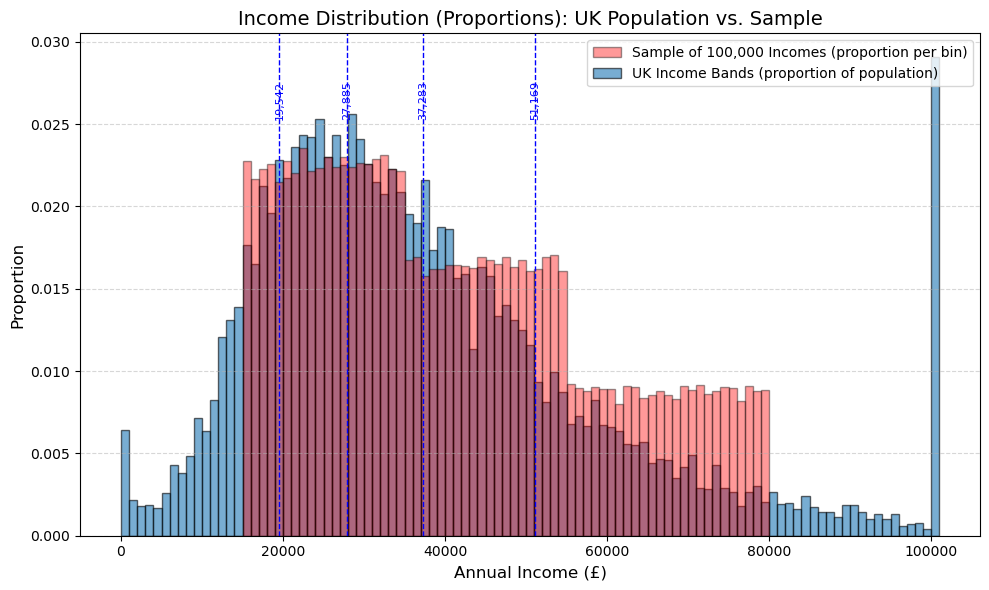

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and clean the binned data
df_bands = pd.read_csv('Downloads/income_band.csv')
df_bands['income_band'] = (
    df_bands['Income band']
      .astype(str)
      .str.replace('[£,]', '', regex=True)
      .astype(float)
      .astype(int)
)

df_bands['midpoint'] = df_bands['income_band'] + 500
df_bands['band_width'] = 1000

# Normalize the frequencies to get proportions
total_freq = df_bands['Frequency'].sum()
df_bands['proportion'] = df_bands['Frequency'] / total_freq

# Construct bin edges
lower_bounds = sorted(df_bands['income_band'].unique())
last_edge = lower_bounds[-1] + 1000
bin_edges = lower_bounds + [last_edge]

# Load and clean the 100k sample data
df_ind = robust

# Quintile transition points
quintile_points = [19542, 27885, 37283, 51169]

# Plot both distributions as proportions
plt.figure(figsize=(10, 6))

# Bar plot of proportion-based income bands
plt.bar(
    df_bands['midpoint'],
    df_bands['proportion'],
    width=df_bands['band_width'],
    align='center',
    alpha=0.6,
    edgecolor='black',
    label='UK Income Bands (proportion of population)'
)

# Histogram of sample incomes, using proportion per bin
n, bins, patches = plt.hist(
    df_ind['income'],
    bins=bin_edges,
    weights=np.ones(len(df_ind)) / len(df_ind),  # each entry counts as 1/N
    alpha=0.4,
    edgecolor='black',
    color='red',
    label='Sample of 100,000 Incomes (proportion per bin)'
)

# Draw vertical lines at quintile transition points
for qp in quintile_points:
    plt.axvline(qp, color='blue', linestyle='--', linewidth=1)

# Optional: label each quintile line near the top
y_max = max(df_bands['proportion'].max(), n.max())
for qp in quintile_points:
    plt.text(qp, y_max * 0.95, f'{qp:,}', rotation=90, va='top', ha='center', fontsize=8, color='blue')

plt.xlabel('Annual Income (£)')
plt.ylabel('Proportion')
plt.title('Income Distribution (Proportions): UK Population vs. Sample')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Code for plotting conditional expectations and conditional probability (by housing tenure, region, age group etc) as below. 

In [12]:
def plot_two_group_nested(series_robust: pd.Series,
                          series_initial: pd.Series,
                          xlabel: str,
                          title: str):
    """
    Plot two big clusters: [Robust | Initial]. Within each cluster, draw one bar per category.
    series_robust   : Pandas Series (index = categories, values = P(category | ... ) from robust)
    series_initial  : Pandas Series (same index = categories, values = P(category | ...) from initial)
    xlabel          : label for the x‐axis
    title           : plot title
    """
    # 1) Reindex initial → robust (fill missing with 0)
    series_initial = series_initial.reindex(series_robust.index, fill_value=0)

    categories = series_robust.index.map(str)
    n = len(categories)
    # Use a distinct color for each category (tab20 can handle up to 20)
    colors = plt.cm.tab20.colors[:n]

    width = 0.8     # bar width
    gap = 1.0       # gap (in “x‐units”) between the two clusters

    # 2) Compute x‐positions for each bar:
    #    - Robust bars at [0, 1, 2, …, n−1]
    #    - Initial bars at [n + gap, (n+gap)+1, …, (n+gap)+(n−1)]
    rob_positions  = np.arange(n)
    init_positions = rob_positions + n + gap

    plt.figure(figsize=(max(6, n * 0.3 + 2), 4))

    # 3) Plot each category as a separate color
    for i, cat in enumerate(categories):
        # Robust bar
        plt.bar(rob_positions[i],
                series_robust.iloc[i],
                width=width,
                color=colors[i],
                edgecolor='black')
        # Initial bar
        plt.bar(init_positions[i],
                series_initial.iloc[i],
                width=width,
                color=colors[i],
                edgecolor='black')

    # 4) Prepare legend: plot invisible bars just to get color/labels in legend
    for i, cat in enumerate(categories):
        plt.bar([], [], color=colors[i], label=cat, edgecolor='black')

    # 5) Place x‐ticks at cluster centers: (0 + (n−1)/2) for “Robust”, (n+gap)+(n−1)/2 for “Initial”
    center_rob  = rob_positions.mean()
    center_init = init_positions.mean()
    plt.xticks([center_rob, center_init], ['Robust', 'Initial'])

    plt.xlabel(xlabel)
    plt.ylabel('Probability')
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_61471/1450568649.py:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cond_tenure_inc5_initial = cond_tenure_inc5_initial.applymap(
/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_61471/1450568649.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cond_tenure_region_initial = cond_tenure_region_initial.applymap(
/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_61471/1450568649.py:37: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cond_tenure_incQ_initial = cond_tenure_incQ_initial.applymap(
/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_61471/1450568649.py:42: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cond_age_tenure_initial = cond_age_tenure_initial.applymap(
/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_61471/1450568649.py:47:

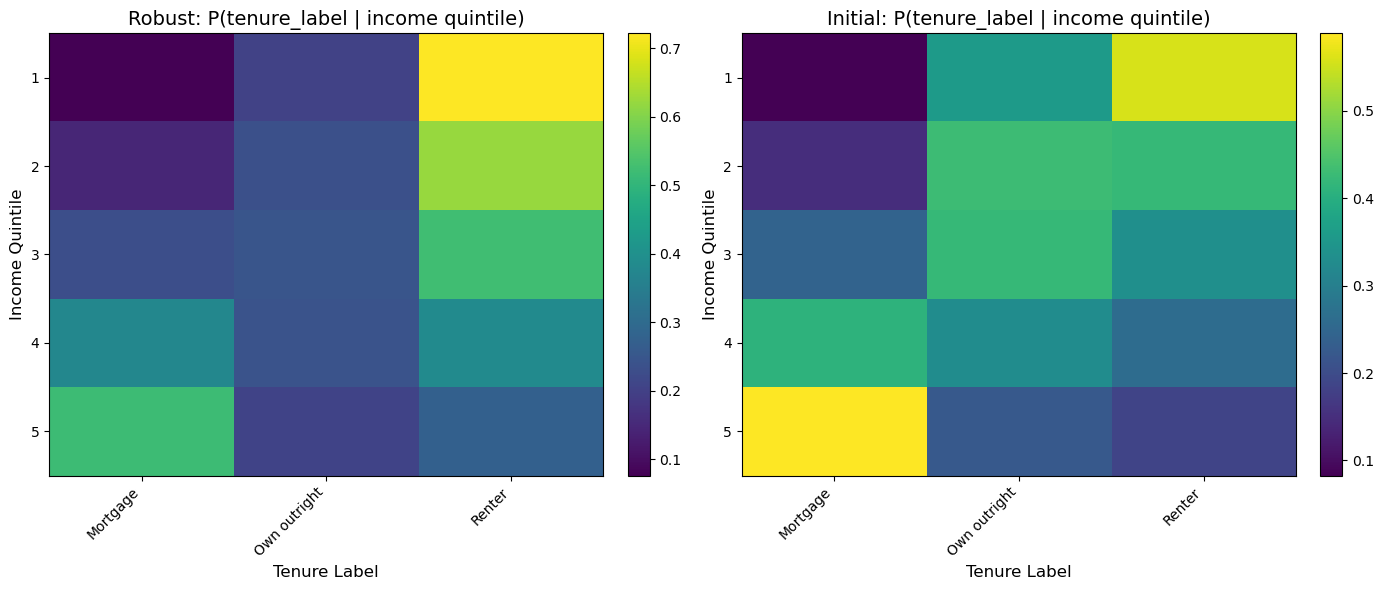

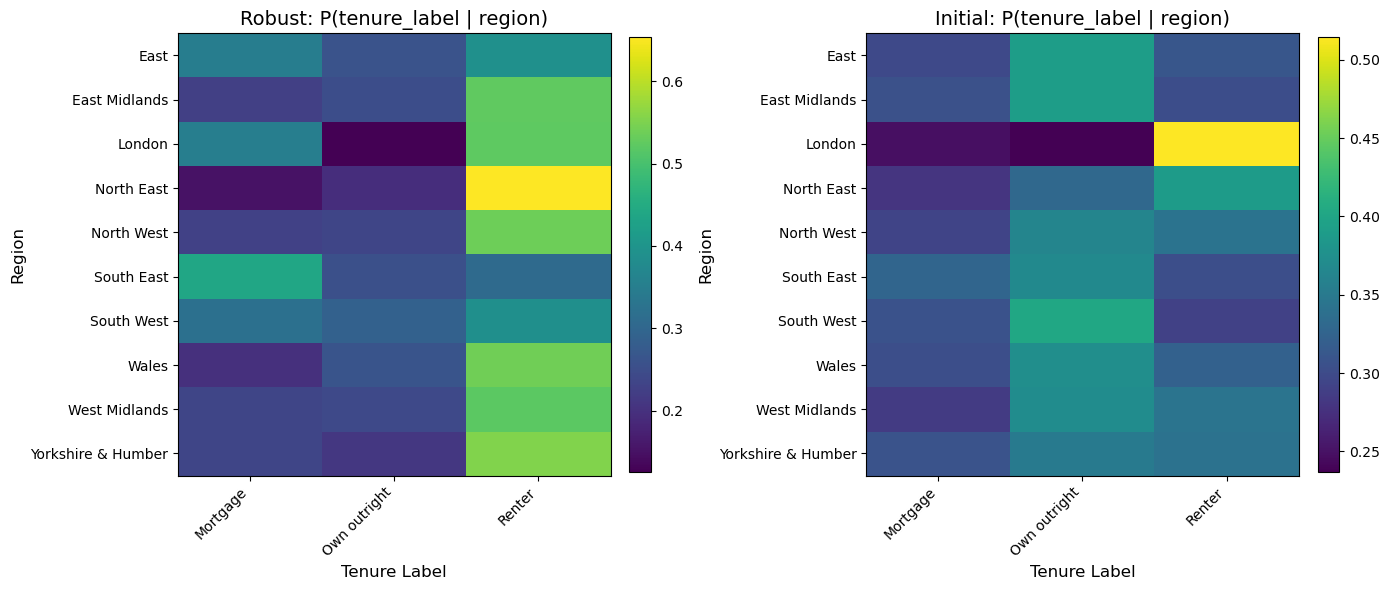

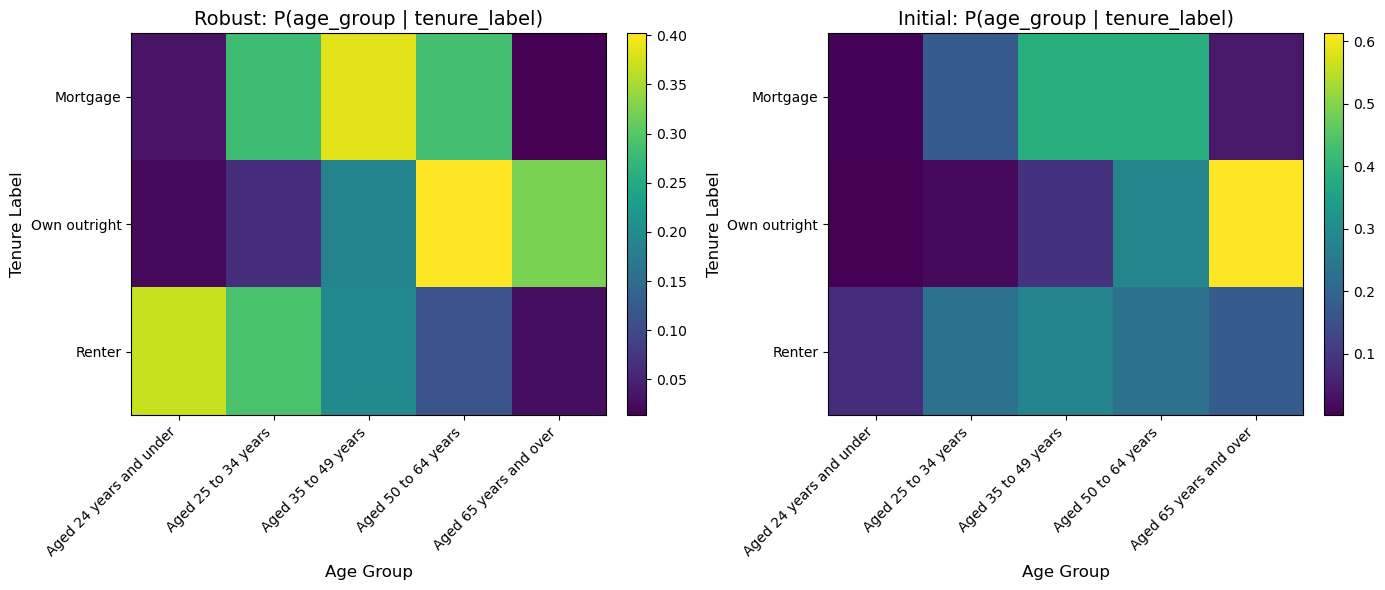

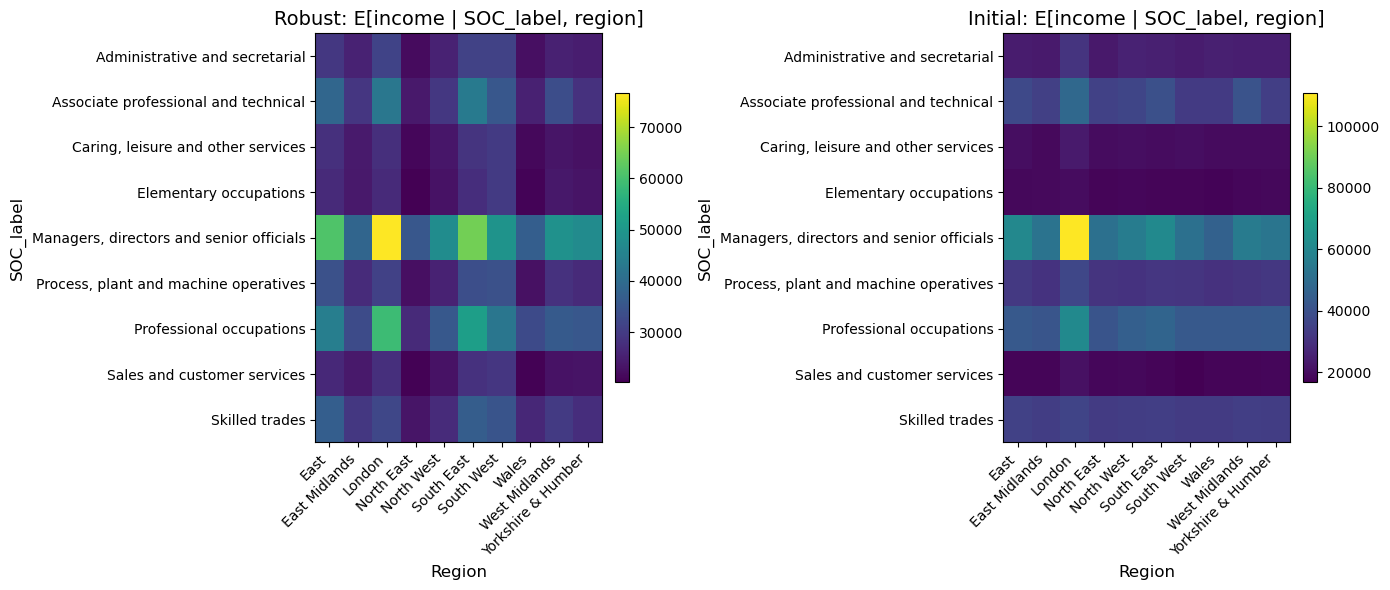

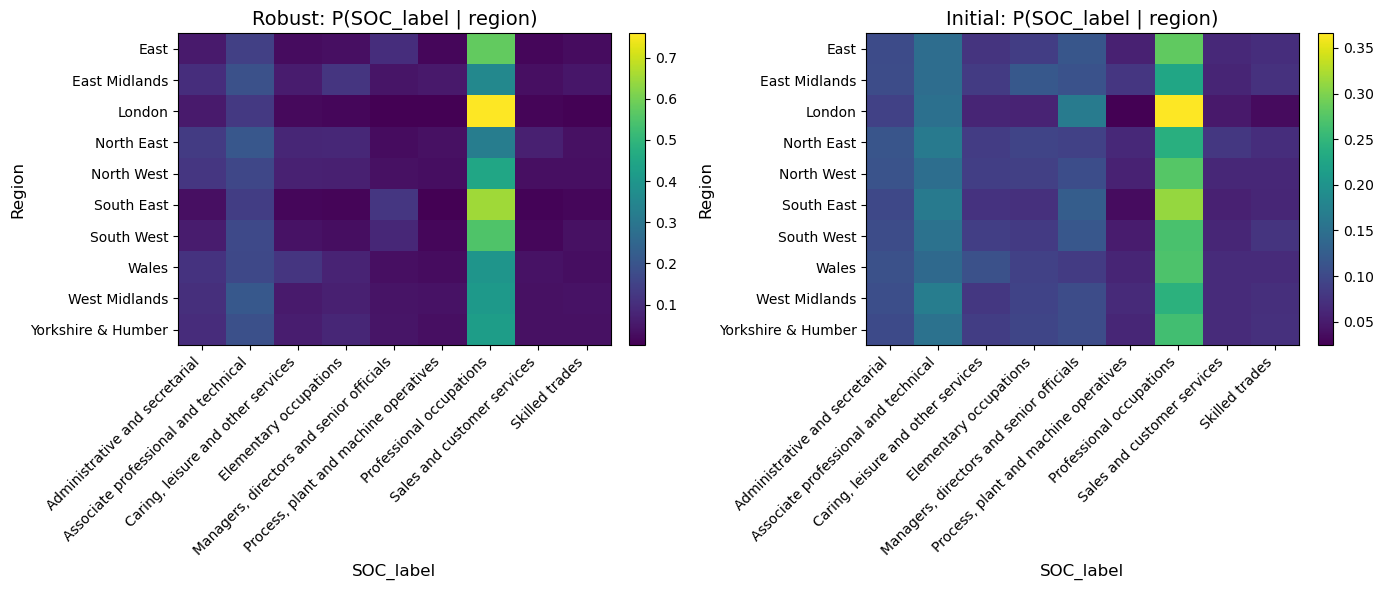

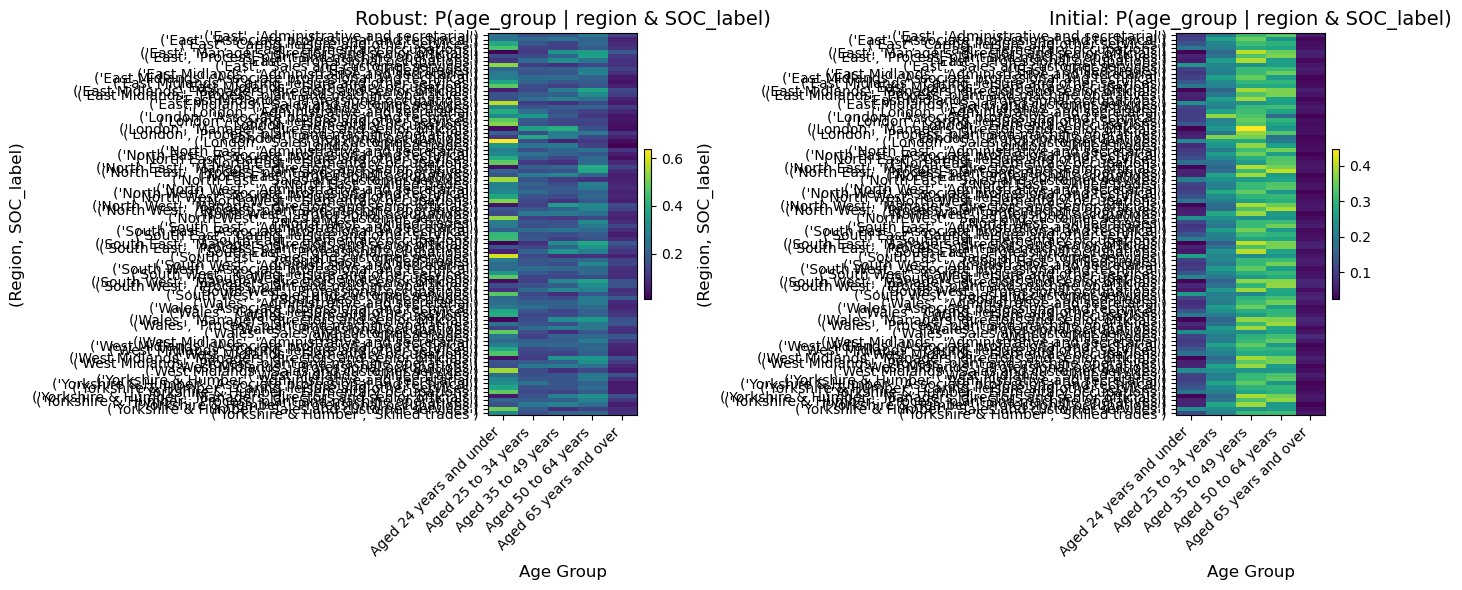

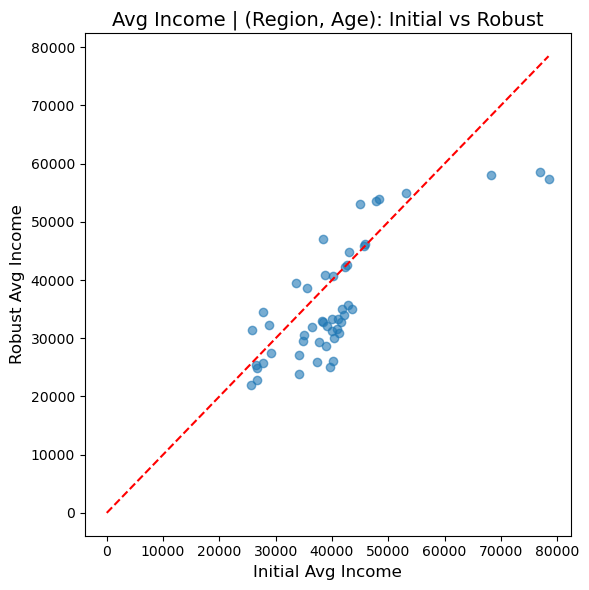

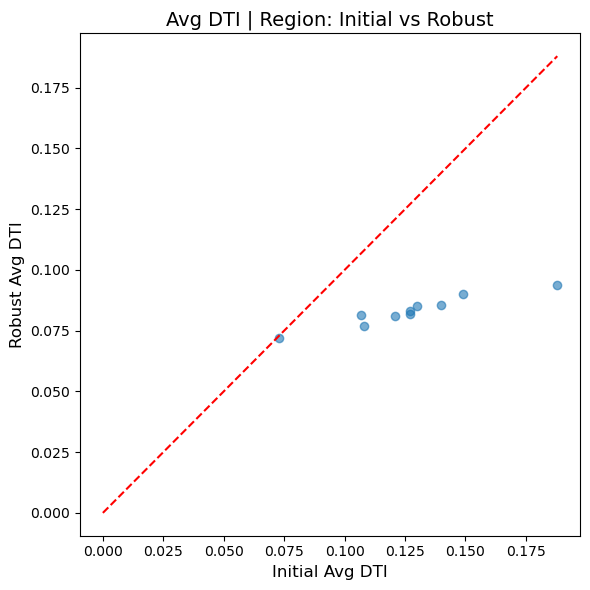

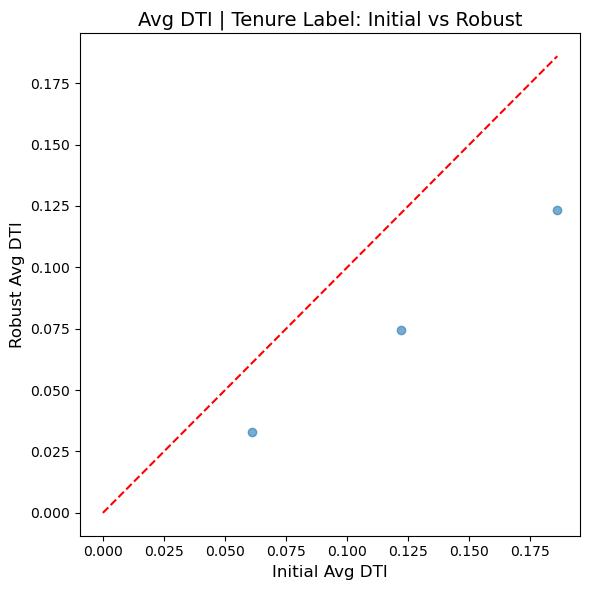

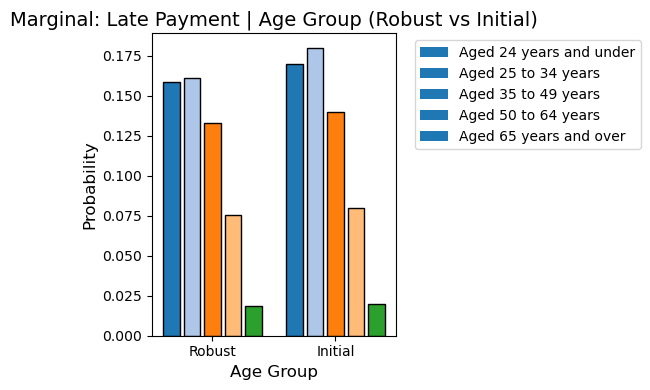

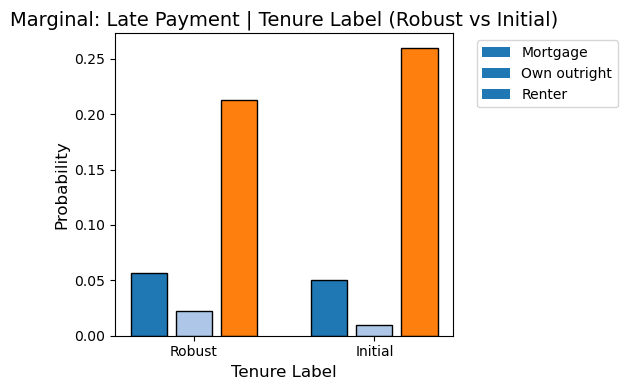

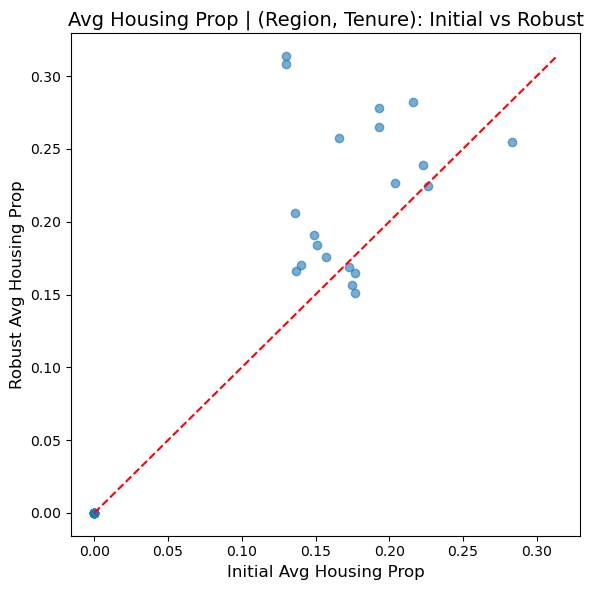

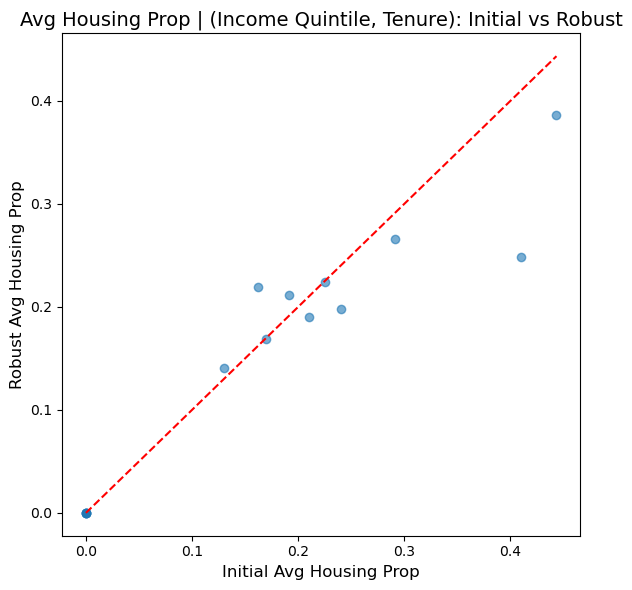

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ─────────────────────────────────────────────────────────────────────────────
# Helper: Clean a pandas Series of “dirty” strings (commas, '%', whitespace) → floats
# ─────────────────────────────────────────────────────────────────────────────
def clean_and_numeric(series: pd.Series) -> pd.Series:
    """
    Convert a Series containing strings like '12,345' or '89%' into numeric floats.
    Non-convertible values become NaN.
    """
    s = (series
         .astype(str)
         .str.replace(',', '',  regex=False)
         .str.replace('%', '',  regex=False)
         .str.strip()
    )
    return pd.to_numeric(s, errors='coerce')


# ─────────────────────────────────────────────────────────────────────────────
# 1) Ensure all “initial” conditional DataFrames are numeric
# ─────────────────────────────────────────────────────────────────────────────

# 1.a) cond_tenure_inc5_initial: index=income quintile, columns=tenure_label
cond_tenure_inc5_initial = cond_tenure_inc5_initial.applymap(
    lambda x: clean_and_numeric(pd.Series([x])).iloc[0]
)

# 1.b) cond_tenure_region_initial: index=region, columns=tenure_label
cond_tenure_region_initial = cond_tenure_region_initial.applymap(
    lambda x: clean_and_numeric(pd.Series([x])).iloc[0]
)

# 1.c) cond_tenure_incQ_initial: index=incQ (treat as income quintile), columns=tenure_label
cond_tenure_incQ_initial = cond_tenure_incQ_initial.applymap(
    lambda x: clean_and_numeric(pd.Series([x])).iloc[0]
)

# 1.d) cond_age_tenure_initial: index=tenure_label, columns=age_group
cond_age_tenure_initial = cond_age_tenure_initial.applymap(
    lambda x: clean_and_numeric(pd.Series([x])).iloc[0]
)

# 1.e) cond_soc_region_initial: index=region, columns=SOC_label
cond_soc_region_initial = cond_soc_region_initial.applymap(
    lambda x: clean_and_numeric(pd.Series([x])).iloc[0]
)


# ─────────────────────────────────────────────────────────────────────────────
# 2) Define helper to plot a pair of heatmaps (robust vs initial)
# ─────────────────────────────────────────────────────────────────────────────
def plot_heatmap_pair(df_robust: pd.DataFrame,
                      df_initial: pd.DataFrame,
                      x_label: str,
                      y_label: str,
                      title_rob: str,
                      title_init: str):
    """
    Display two side‐by‐side heatmaps: one for df_robust, one for df_initial.
    Both DataFrames must have the same index/columns (or will be reindexed).
    
    df_robust  : DataFrame(index=conditioning, columns=outcome, values=P(outcome|cond))
    df_initial : same shape; may have different index/columns.
    x_label    : label for horizontal axis (outcomes)
    y_label    : label for vertical axis (conditioning categories)
    title_rob  : title for robust heatmap
    title_init : title for initial heatmap
    """
    # 1) Align df_initial → df_robust
    df_init_aligned = df_initial.reindex(
        index=df_robust.index,
        columns=df_robust.columns,
        fill_value=0
    )
    
    data_rob  = df_robust.values
    data_init = df_init_aligned.values
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    im0 = axes[0].imshow(data_rob, aspect='auto', cmap='viridis')
    axes[0].set_xticks(np.arange(len(df_robust.columns)))
    axes[0].set_xticklabels(df_robust.columns, rotation=45, ha='right')
    axes[0].set_yticks(np.arange(len(df_robust.index)))
    axes[0].set_yticklabels(df_robust.index)
    axes[0].set_xlabel(x_label)
    axes[0].set_ylabel(y_label)
    axes[0].set_title(title_rob)
    fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)
    
    im1 = axes[1].imshow(data_init, aspect='auto', cmap='viridis')
    axes[1].set_xticks(np.arange(len(df_robust.columns)))
    axes[1].set_xticklabels(df_robust.columns, rotation=45, ha='right')
    axes[1].set_yticks(np.arange(len(df_robust.index)))
    axes[1].set_yticklabels(df_robust.index)
    axes[1].set_xlabel(x_label)
    axes[1].set_ylabel(y_label)
    axes[1].set_title(title_init)
    fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)
    
    
    plt.tight_layout()
    plt.show()


# ─────────────────────────────────────────────────────────────────────────────
# 3) Alternative: “facet bar charts” for one conditional as example
#    (Optional; comment out if not needed)
# ─────────────────────────────────────────────────────────────────────────────
def plot_facet_bars(cond_robust: pd.DataFrame,
                    cond_initial: pd.DataFrame,
                    cond_label: str,
                    outcome_label: str,
                    figsize_per_facet=(3, 3)):
    """
    For each conditioning category, draw a small bar chart showing robust vs initial
    distribution over outcomes. Plots are arranged in a grid.
    
    cond_robust  : DataFrame(index=conditioning, columns=outcome)
    cond_initial : DataFrame(index=conditioning, columns=outcome)
    cond_label   : label for conditioning axis (e.g. 'Income Quintile')
    outcome_label: label for outcome axis  (e.g. 'Tenure Label')
    """
    # 1) Align cond_initial → cond_robust
    cond_initial = cond_initial.reindex(
        index=cond_robust.index,
        columns=cond_robust.columns,
        fill_value=0
    )
    
    categories = list(cond_robust.index.astype(str))
    outcomes   = list(cond_robust.columns.astype(str))
    n_cats     = len(categories)
    
    # Determine grid size (roughly square)
    n_cols = int(np.ceil(np.sqrt(n_cats)))
    n_rows = int(np.ceil(n_cats / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols,
                             figsize=(n_cols * figsize_per_facet[0],
                                      n_rows * figsize_per_facet[1]),
                             squeeze=False)
    
    for idx, cat in enumerate(categories):
        r = idx // n_cols
        c = idx % n_cols
        ax = axes[r][c]
        
        robust_vals  = cond_robust.loc[cat].values
        initial_vals = cond_initial.loc[cat].values
        x = np.arange(len(outcomes))
        width = 0.35
        
        ax.bar(x - width/2, robust_vals,  width, label='Robust', alpha=0.8)
        ax.bar(x + width/2, initial_vals, width, label='Initial', alpha=0.5)
        ax.set_xticks(x)
        ax.set_xticklabels(outcomes, rotation=45, ha='right')
        ax.set_title(f'{cond_label} = {cat}')
        if r == n_rows - 1:
            ax.set_xlabel(outcome_label)
        if c == 0:
            ax.set_ylabel('Probability')
        ax.legend(fontsize='small')
    
    # Hide any empty subplots
    for idx in range(n_cats, n_rows * n_cols):
        r = idx // n_cols
        c = idx % n_cols
        fig.delaxes(axes[r][c])
    
    plt.tight_layout()
    plt.show()


# ─────────────────────────────────────────────────────────────────────────────
# 4) Plot all 14 conditional marginals using heatmaps and facet bars
# ─────────────────────────────────────────────────────────────────────────────

# 4.1) P(tenure_label | income quintile)
#      Use heatmap pair
plot_heatmap_pair(
    cond_tenure_inc5_robust,
    cond_tenure_inc5_initial,
    x_label='Tenure Label',
    y_label='Income Quintile',
    title_rob='Robust: P(tenure_label | income quintile)',
    title_init='Initial: P(tenure_label | income quintile)'
)

# (Optional) facet bar chart for the same conditional:
# plot_facet_bars(
#     cond_tenure_inc5_robust,
#     cond_tenure_inc5_initial,
#     cond_label='Income Quintile',
#     outcome_label='Tenure Label'
# )


# 4.2) P(tenure_label | region)
plot_heatmap_pair(
    cond_tenure_region_robust,
    cond_tenure_region_initial,
    x_label='Tenure Label',
    y_label='Region',
    title_rob='Robust: P(tenure_label | region)',
    title_init='Initial: P(tenure_label | region)'
)

# (Optional) facet bar chart:
# plot_facet_bars(
#     cond_tenure_region_robust,
#     cond_tenure_region_initial,
#     cond_label='Region',
#     outcome_label='Tenure Label'
# )


# 4.3) P(tenure_label | income quintile (“incQ”))  ← duplicate of 4.1; skip.


# 4.4) P(age_group | tenure_label) - corrected + heat map
# --- Robust side (unchanged) ---
cond_age_tenure_robust = (
    robust
    .groupby(['tenure_label', 'age_group'])
    .size()
    .div(robust.groupby('tenure_label').size(), level='tenure_label')
    .unstack(fill_value=0)
)
# cond_age_tenure_robust: index = tenure_label, columns = age_group

# --- Initial side: rename columns so “tenure_label” and “age_group” match exactly ---
dfa = breakdown_by_tenure_label_and_age.rename(
    columns={'tenure label': 'tenure_label', 'age group': 'age_group'}
)
tmp = (
    dfa
    .groupby(['tenure_label', 'age_group'])['frequency']
    .sum()
)
cond_age_tenure_initial = tmp.div(tmp.groupby(level=0).sum(), level=0).unstack(fill_value=0)
# cond_age_tenure_initial: index = tenure_label, columns = age_group

# Now plot side‐by‐side heatmaps
plot_heatmap_pair(
    cond_age_tenure_robust,
    cond_age_tenure_initial,
    x_label='Age Group',
    y_label='Tenure Label',
    title_rob='Robust: P(age_group | tenure_label)',
    title_init='Initial: P(age_group | tenure_label)'
)

# (Optional) facet bars:
# plot_facet_bars(
#     cond_age_tenure_robust,
#     cond_age_tenure_initial,
#     cond_label='Tenure Label',
#     outcome_label='Age Group'
# )


# 4.5) E[income | SOC_label, region] – corrected + heatmap
# --- Robust side (unchanged) ---
avg_income_soc_region_robust = (
    robust
    .groupby(['SOC_label', 'region'])['income']
    .mean()
    .unstack(fill_value=0)
)
# avg_income_soc_region_robust: index = SOC_label, columns = region

# --- Initial side: ensure index = SOC_label, columns = region ---
avg_income_soc_region_initial = breakdown_by_income_and_SOC.copy()

# If “breakdown_by_income_and_SOC” has a column named "SOC_label" but is not already indexed:
if 'SOC_code' in avg_income_soc_region_initial.columns:
    pd.Index.rename('SOC_label', inplace = True)
    avg_income_soc_region_initial = avg_income_soc_region_initial.set_index('SOC_label')

# Now both DataFrames share:
#   index = SOC_label
#   columns = region
plot_heatmap_pair(
    avg_income_soc_region_robust,
    avg_income_soc_region_initial,
    x_label='Region',
    y_label='SOC_label',
    title_rob='Robust: E[income | SOC_label, region]',
    title_init='Initial: E[income | SOC_label, region]'
)


# 4.6) P(SOC_label | region) - corrected + heatmap
# --- Robust side (unchanged) ---
counts_soc_region_robust = (
    robust
    .groupby(['region', 'SOC_label'])
    .size()
    .unstack(fill_value=0)
)
cond_soc_region_robust = counts_soc_region_robust.div(
    counts_soc_region_robust.sum(axis=1), axis=0
)
# cond_soc_region_robust: index = region, columns = SOC_label

# --- Initial side: transpose breakdown_by_region_and_SOC so index=region, columns=SOC_label ---
temp = breakdown_by_region_and_SOC.copy()
# breakdown_by_region_and_SOC currently has index=SOC_label, columns=region
temp = temp.T
# Now: index=region, columns=SOC_label
cond_soc_region_initial = temp.div(temp.sum(axis=1), axis=0)
# cond_soc_region_initial: index=region, columns=SOC_label

plot_heatmap_pair(
    cond_soc_region_robust,
    cond_soc_region_initial,
    x_label='SOC_label',
    y_label='Region',
    title_rob='Robust: P(SOC_label | region)',
    title_init='Initial: P(SOC_label | region)'
)

# (Optional) facet bars:
# plot_facet_bars(
#     cond_soc_region_robust,
#     cond_soc_region_initial,
#     cond_label='Region',
#     outcome_label='SOC_label'
# )


# 4.7) P(age_group | (region, SOC_label)) – corrected + heatmap
# --- Robust side (unchanged) ---
counts_age_region_soc_robust = (
    robust
    .groupby(['region', 'SOC_label', 'age_group'])
    .size()
    .rename('count')
    .reset_index()
)
counts_age_region_soc_robust['cond_prob'] = (
    counts_age_region_soc_robust['count']
    / counts_age_region_soc_robust
        .groupby(['region', 'SOC_label'])['count']
        .transform('sum')
)
cond_age_region_soc_robust = counts_age_region_soc_robust.pivot_table(
    index=['region', 'SOC_label'],
    columns='age_group',
    values='cond_prob',
    fill_value=0
)
# cond_age_region_soc_robust: index = (region, SOC_label), columns = age_group

# --- Initial side: rename “age group” → “age_group”, then pivot exactly the same way ---
df = breakdown_by_region_and_SOC_and_age.rename(columns={'age group': 'age_group'})
tmp = df.copy()
tmp['cond_prob'] = (
    tmp['Observation']
    / tmp.groupby(['region', 'SOC_label'])['Observation'].transform('sum')
)
cond_age_region_soc_initial = tmp.pivot_table(
    index=['region', 'SOC_label'],
    columns='age_group',
    values='cond_prob',
    fill_value=0
)
# cond_age_region_soc_initial: index = (region, SOC_label), columns = age_group

plot_heatmap_pair(
    cond_age_region_soc_robust,
    cond_age_region_soc_initial,
    x_label='Age Group',
    y_label='(Region, SOC_label)',
    title_rob='Robust: P(age_group | region & SOC_label)',
    title_init='Initial: P(age_group | region & SOC_label)'
)

# 4.8) E[income | (region, age_group)] – scatter
robust_flat2  = avg_income_region_age_robust.stack()
initial_flat2 = avg_income_region_age_initial.stack()
common_idx2   = robust_flat2.index.intersection(initial_flat2.index)

plt.figure(figsize=(6, 6))
plt.scatter(initial_flat2.loc[common_idx2],
            robust_flat2.loc[common_idx2],
            alpha=0.6)
m2 = max(initial_flat2.max(), robust_flat2.max())
plt.plot([0, m2], [0, m2], color='red', linestyle='--')
plt.xlabel('Initial Avg Income')
plt.ylabel('Robust Avg Income')
plt.title('Avg Income | (Region, Age): Initial vs Robust')
plt.tight_layout()
plt.show()



# 4.9) E[dti | region] – scatter
common_idx3 = avg_dti_region_robust.index.intersection(avg_dti_region_initial.index)

plt.figure(figsize=(6, 6))
plt.scatter(avg_dti_region_initial.loc[common_idx3],
            avg_dti_region_robust.loc[common_idx3],
            alpha=0.6)
m3 = max(avg_dti_region_initial.max(), avg_dti_region_robust.max())
plt.plot([0, m3], [0, m3], color='red', linestyle='--')
plt.xlabel('Initial Avg DTI')
plt.ylabel('Robust Avg DTI')
plt.title('Avg DTI | Region: Initial vs Robust')
plt.tight_layout()
plt.show()


# 4.10) E[dti | tenure_label] – scatter
common_idx4 = avg_dti_tenure_robust.index.intersection(avg_dti_tenure_initial.index)

plt.figure(figsize=(6, 6))
plt.scatter(avg_dti_tenure_initial.loc[common_idx4],
            avg_dti_tenure_robust.loc[common_idx4],
            alpha=0.6)
m4 = max(avg_dti_tenure_initial.max(), avg_dti_tenure_robust.max())
plt.plot([0, m4], [0, m4], color='red', linestyle='--')
plt.xlabel('Initial Avg DTI')
plt.ylabel('Robust Avg DTI')
plt.title('Avg DTI | Tenure Label: Initial vs Robust')
plt.tight_layout()
plt.show()


# 4.11) P(late=1 | age_group) – two‐cluster nested
plot_two_group_nested(
    series_robust  = late_by_age,
    series_initial = late_by_age_initial,
    xlabel         = 'Age Group',
    title          = 'Marginal: Late Payment | Age Group (Robust vs Initial)'
)


# 4.12) P(late=1 | tenure_label) – two‐cluster nested
plot_two_group_nested(
    series_robust  = late_by_tenure,
    series_initial = late_by_tenure_initial,
    xlabel         = 'Tenure Label',
    title          = 'Marginal: Late Payment | Tenure Label (Robust vs Initial)'
)


# 4.13) E[housing_prop | (region, tenure_label)] – scatter
rob_hp_flat  = avg_housing_prop_region_tenure_robust.stack()
init_hp_flat = avg_housing_prop_region_tenure_initial.stack()
common_idx5 = rob_hp_flat.index.intersection(init_hp_flat.index)

plt.figure(figsize=(6, 6))
plt.scatter(init_hp_flat.loc[common_idx5],
            rob_hp_flat.loc[common_idx5],
            alpha=0.6)
m5 = max(init_hp_flat.max(), rob_hp_flat.max())
plt.plot([0, m5], [0, m5], color='red', linestyle='--')
plt.xlabel('Initial Avg Housing Prop')
plt.ylabel('Robust Avg Housing Prop')
plt.title('Avg Housing Prop | (Region, Tenure): Initial vs Robust')
plt.tight_layout()
plt.show()


# 4.14) E[housing_prop | (income quintile, tenure_label)] – scatter
rob_hp_i_flat  = avg_housing_prop_inc5_tenure_robust.stack()
init_hp_i_flat = avg_housing_prop_inc5_tenure_initial.stack()
common_idx6    = rob_hp_i_flat.index.intersection(init_hp_i_flat.index)

plt.figure(figsize=(6, 6))
plt.scatter(init_hp_i_flat.loc[common_idx6],
            rob_hp_i_flat.loc[common_idx6],
            alpha=0.6)
m6 = max(init_hp_i_flat.max(), rob_hp_i_flat.max())
plt.plot([0, m6], [0, m6], color='red', linestyle='--')
plt.xlabel('Initial Avg Housing Prop')
plt.ylabel('Robust Avg Housing Prop')
plt.title('Avg Housing Prop | (Income Quintile, Tenure): Initial vs Robust')
plt.tight_layout()
plt.show()


In [14]:
robust.groupby('tenure_label').agg({'income':'count'})

,income
tenure_label,
Mortgage,31302
Own outright,22690
Renter,46008


In [46]:
robust.groupby('tenure_label').agg({'dti':'mean'})

,dti
tenure_label,
Mortgage,0.177323
Own outright,0.068420
Renter,0.109832


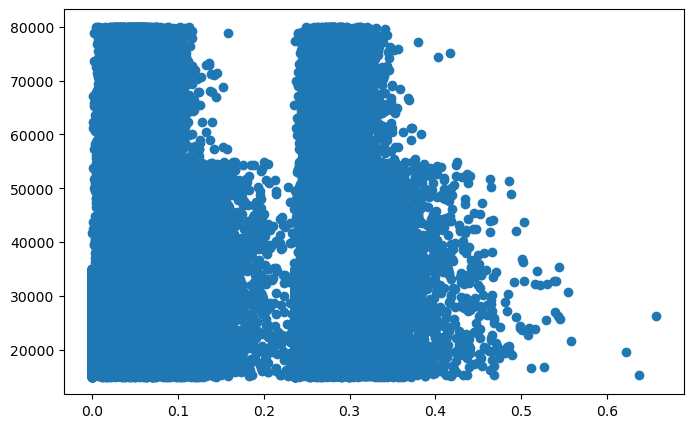

In [48]:
plt.scatter(robust['dti'],robust['income'])

Same code, but with uniform colour scheme for probability on both initial + robust

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_61471/1738248418.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cond_tenure_inc5_initial = cond_tenure_inc5_initial.applymap(
/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_61471/1738248418.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cond_tenure_region_initial = cond_tenure_region_initial.applymap(
/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_61471/1738248418.py:38: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cond_tenure_incQ_initial = cond_tenure_incQ_initial.applymap(
/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_61471/1738248418.py:43: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cond_age_tenure_initial = cond_age_tenure_initial.applymap(
/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_61471/1738248418.py:48:

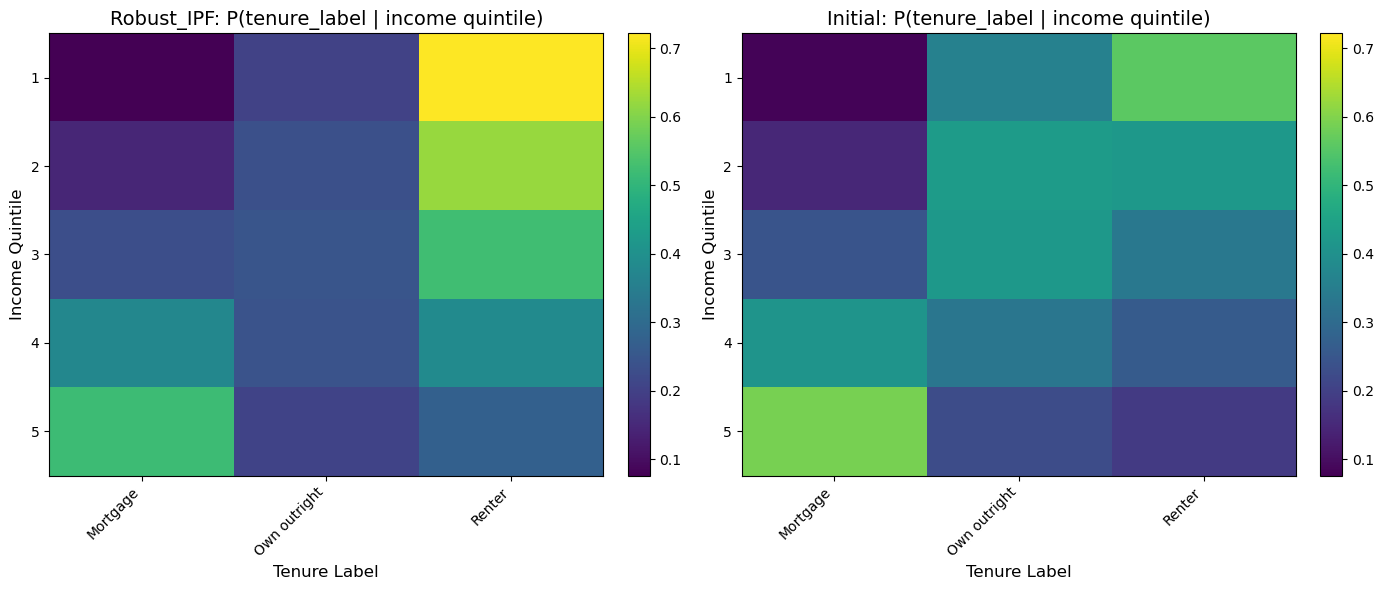

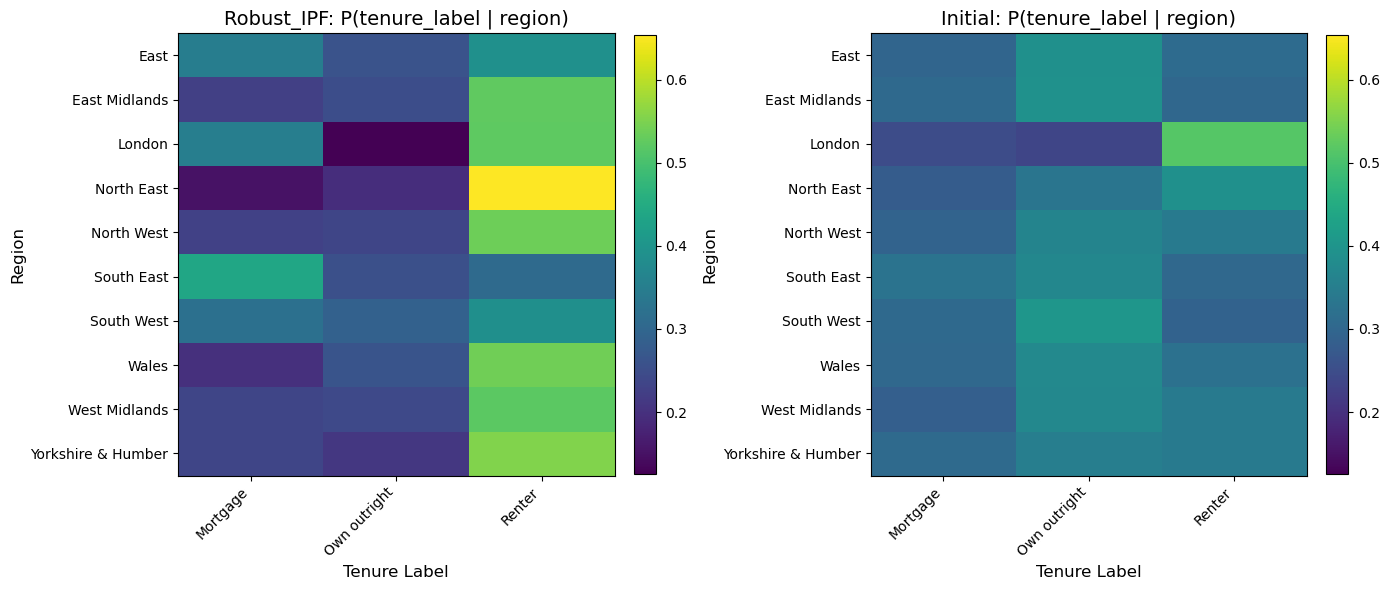

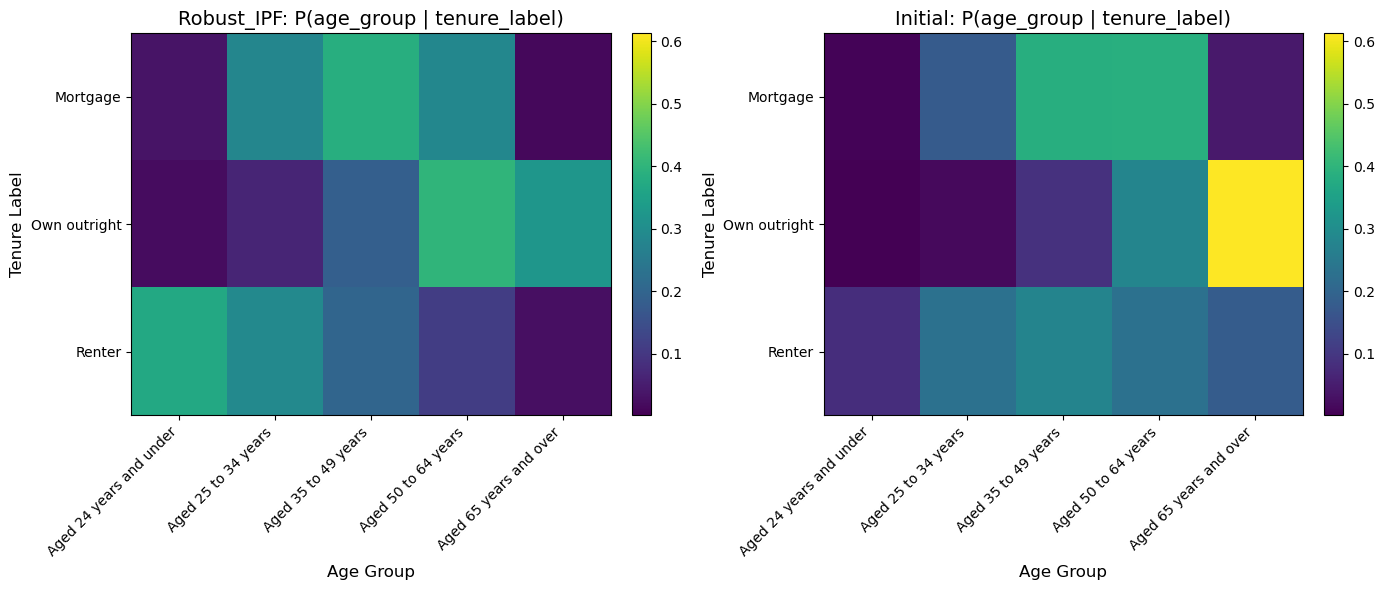

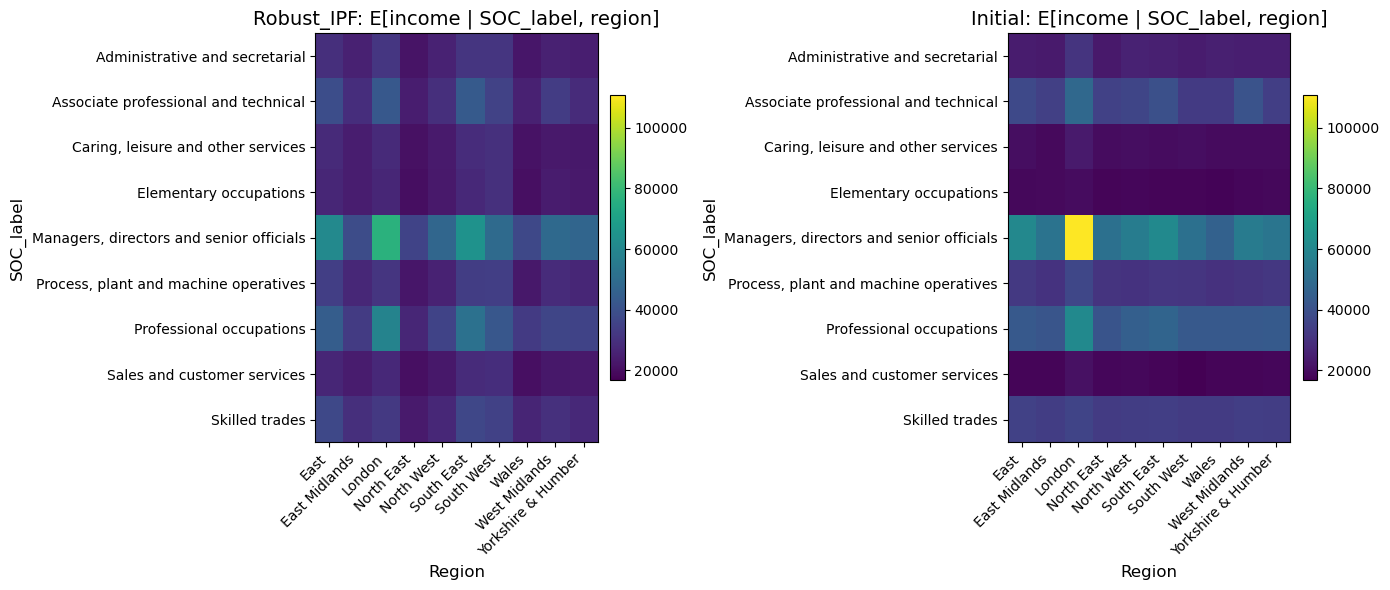

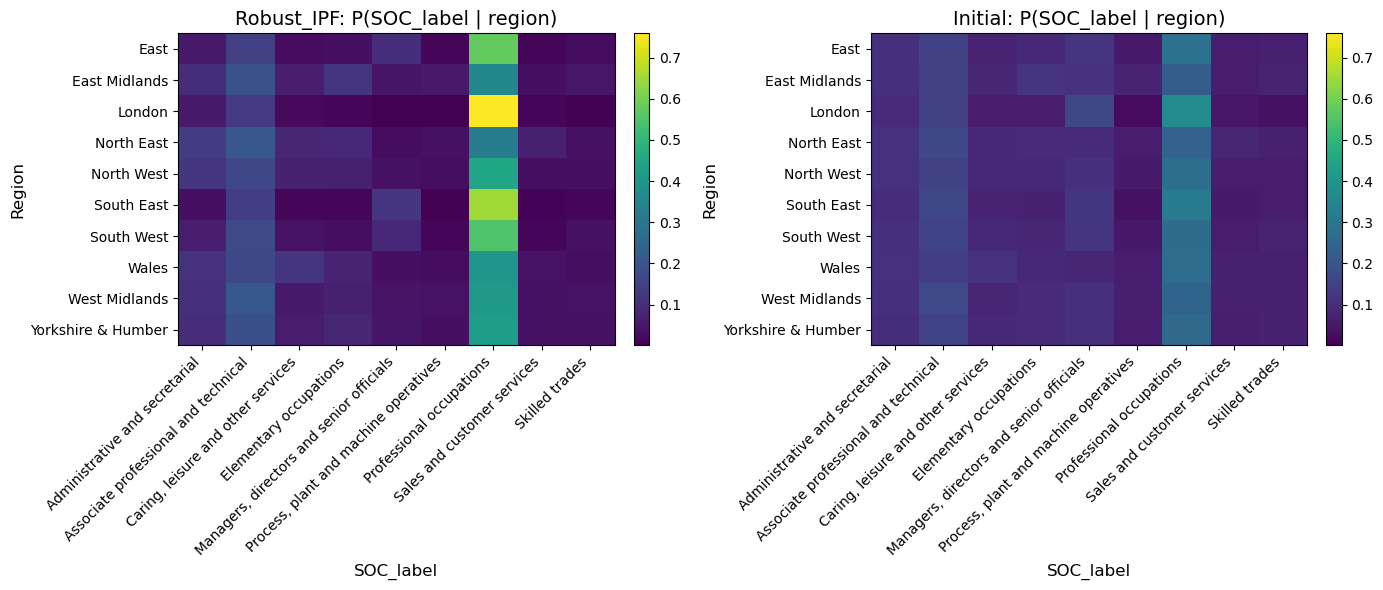

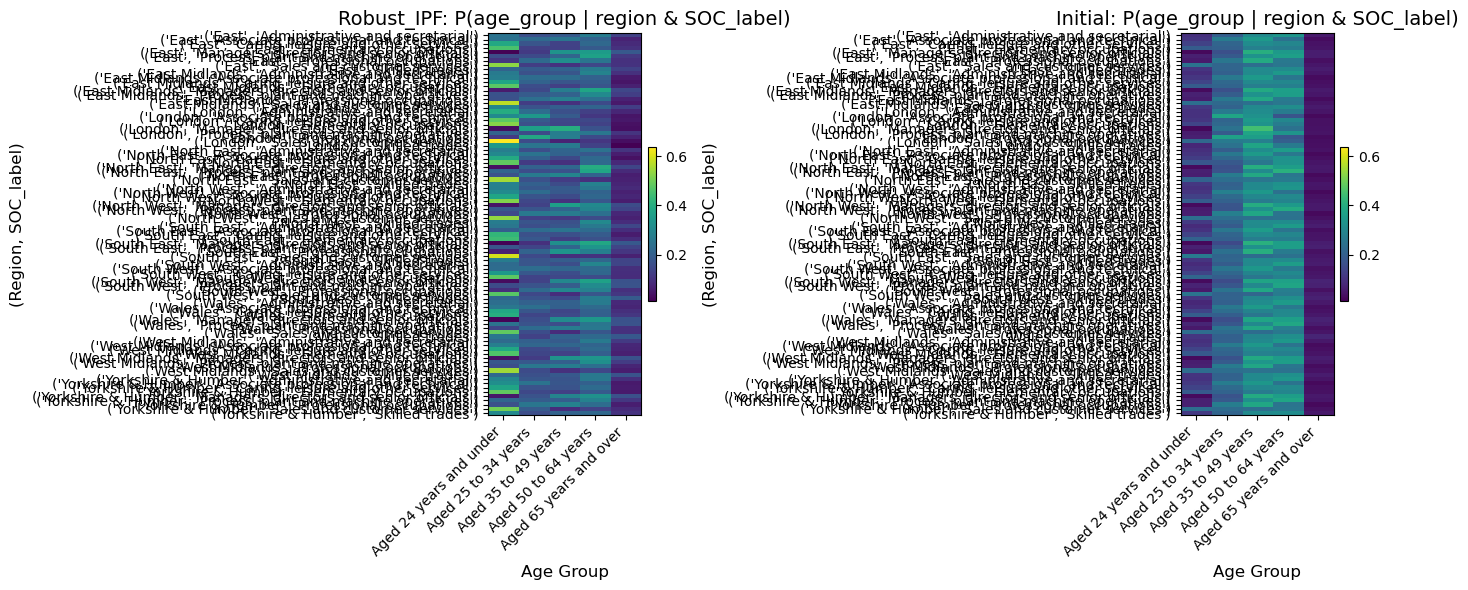

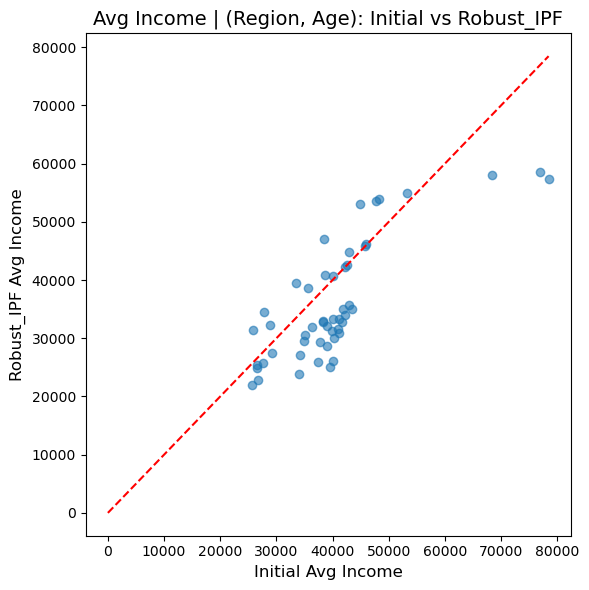

0.46186331455605045
[[1.        0.7906529]
 [0.7906529 1.       ]]


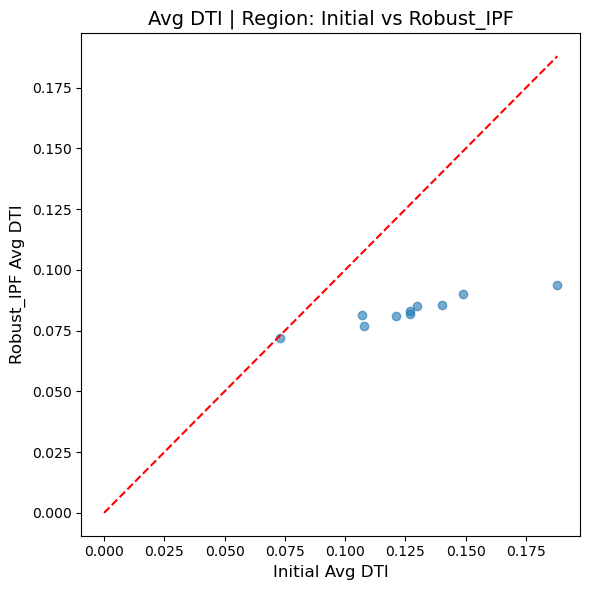

-2.4433690633569394
[[ 1.       -0.056765]
 [-0.056765  1.      ]]


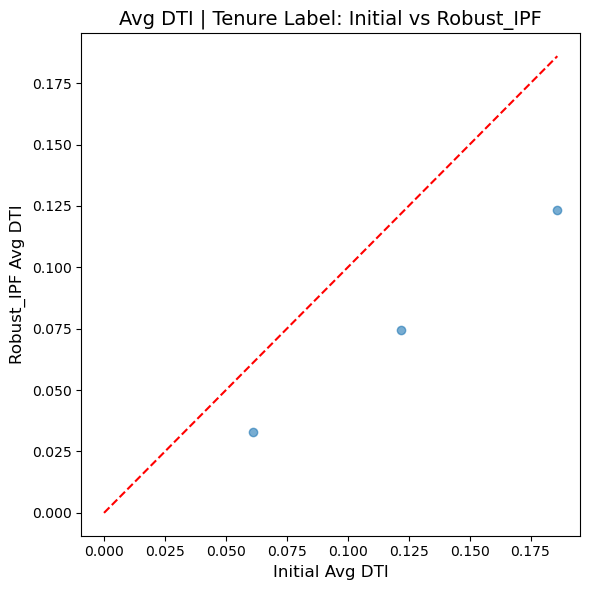

-2.7879891365946183
[[ 1.         -0.99841812]
 [-0.99841812  1.        ]]


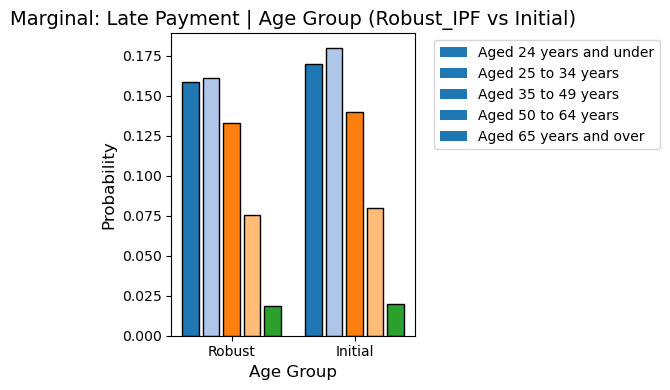

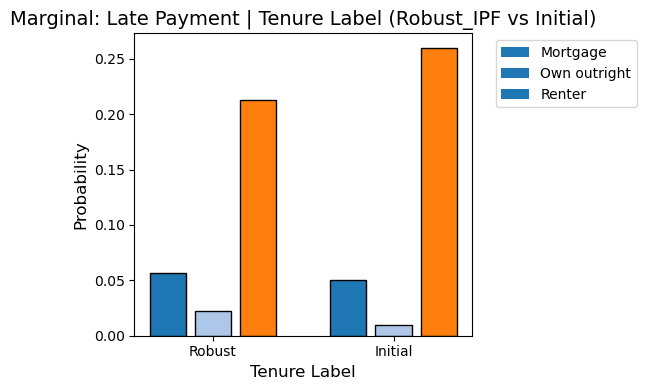

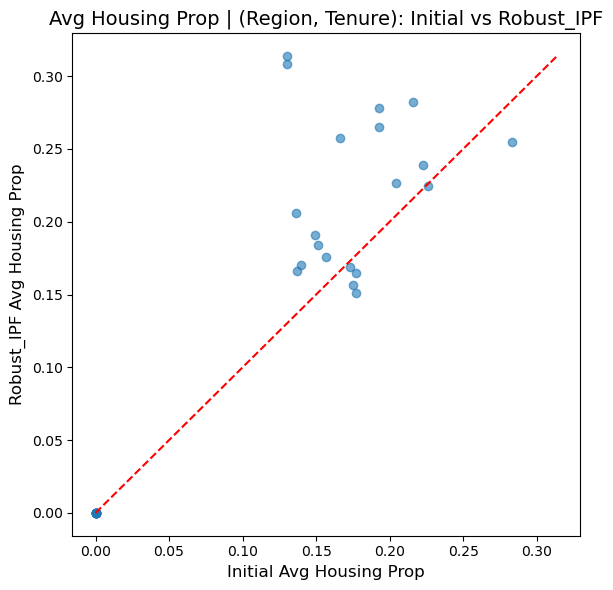

0.5656545707243308
[[1.         0.89241175]
 [0.89241175 1.        ]]


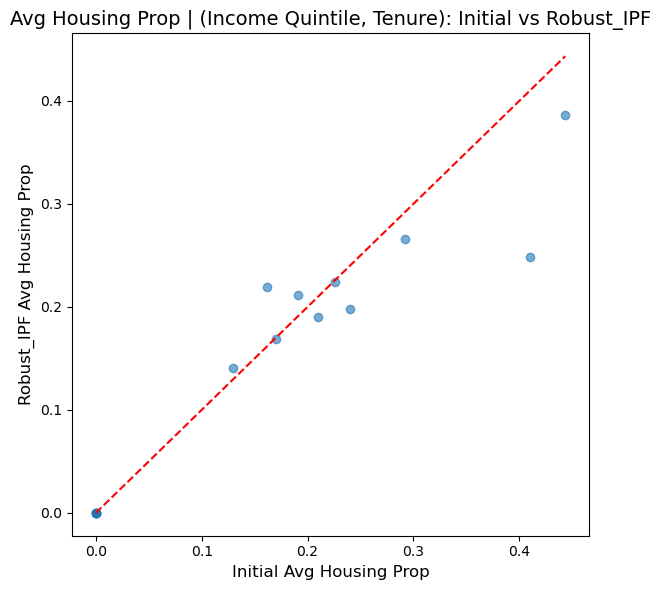

0.8816572494135303
[[1.         0.95207546]
 [0.95207546 1.        ]]


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics

# ─────────────────────────────────────────────────────────────────────────────
# Helper: Clean a pandas Series of “dirty” strings (commas, '%', whitespace) → floats
# ─────────────────────────────────────────────────────────────────────────────
def clean_and_numeric(series: pd.Series) -> pd.Series:
    """
    Convert a Series containing strings like '12,345' or '89%' into numeric floats.
    Non-convertible values become NaN.
    """
    s = (series
         .astype(str)
         .str.replace(',', '',  regex=False)
         .str.replace('%', '',  regex=False)
         .str.strip()
    )
    return pd.to_numeric(s, errors='coerce')


# ─────────────────────────────────────────────────────────────────────────────
# 1) Ensure all “initial” conditional DataFrames are numeric
# ─────────────────────────────────────────────────────────────────────────────

# 1.a) cond_tenure_inc5_initial: index=income quintile, columns=tenure_label
cond_tenure_inc5_initial = cond_tenure_inc5_initial.applymap(
    lambda x: clean_and_numeric(pd.Series([x])).iloc[0]
)

# 1.b) cond_tenure_region_initial: index=region, columns=tenure_label
cond_tenure_region_initial = cond_tenure_region_initial.applymap(
    lambda x: clean_and_numeric(pd.Series([x])).iloc[0]
)

# 1.c) cond_tenure_incQ_initial: index=incQ (treat as income quintile), columns=tenure_label
cond_tenure_incQ_initial = cond_tenure_incQ_initial.applymap(
    lambda x: clean_and_numeric(pd.Series([x])).iloc[0]
)

# 1.d) cond_age_tenure_initial: index=tenure_label, columns=age_group
cond_age_tenure_initial = cond_age_tenure_initial.applymap(
    lambda x: clean_and_numeric(pd.Series([x])).iloc[0]
)

# 1.e) cond_soc_region_initial: index=region, columns=SOC_label
cond_soc_region_initial = cond_soc_region_initial.applymap(
    lambda x: clean_and_numeric(pd.Series([x])).iloc[0]
)


# ─────────────────────────────────────────────────────────────────────────────
# 2) Define helper to plot a pair of heatmaps (robust vs initial)
# ─────────────────────────────────────────────────────────────────────────────
def plot_heatmap_pair(df_robust: pd.DataFrame,
                      df_initial: pd.DataFrame,
                      x_label: str,
                      y_label: str,
                      title_rob: str,
                      title_init: str):
    """
    Display two side‐by‐side heatmaps: one for df_robust, one for df_initial.
    Both DataFrames must have the same index/columns (or will be reindexed).

    df_robust  : DataFrame(index=conditioning, columns=outcome, values=P(outcome|cond))
    df_initial : same shape; may have different index/columns.
    x_label    : label for horizontal axis (outcomes)
    y_label    : label for vertical axis (conditioning categories)
    title_rob  : title for robust heatmap
    title_init : title for initial heatmap
    """
    # 1) Align df_initial → df_robust
    df_init_aligned = df_initial.reindex(
        index=df_robust.index,
        columns=df_robust.columns,
        fill_value=0
    )

    data_rob  = df_robust.values
    data_init = df_init_aligned.values

    # 2) Compute shared vmin/vmax across both matrices
    vmin = min(data_rob.min(), data_init.min())
    vmax = max(data_rob.max(), data_init.max())

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # 3) Plot the "robust" heatmap with the shared scale
    im0 = axes[0].imshow(data_rob, aspect='auto', cmap='viridis', vmin=vmin, vmax=vmax)
    axes[0].set_xticks(np.arange(len(df_robust.columns)))
    axes[0].set_xticklabels(df_robust.columns, rotation=45, ha='right')
    axes[0].set_yticks(np.arange(len(df_robust.index)))
    axes[0].set_yticklabels(df_robust.index)
    axes[0].set_xlabel(x_label)
    axes[0].set_ylabel(y_label)
    axes[0].set_title(title_rob)
    fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)

    # 4) Plot the "initial" heatmap, using exactly the same vmin/vmax
    im1 = axes[1].imshow(data_init, aspect='auto', cmap='viridis', vmin=vmin, vmax=vmax)
    axes[1].set_xticks(np.arange(len(df_robust.columns)))
    axes[1].set_xticklabels(df_robust.columns, rotation=45, ha='right')
    axes[1].set_yticks(np.arange(len(df_robust.index)))
    axes[1].set_yticklabels(df_robust.index)
    axes[1].set_xlabel(x_label)
    axes[1].set_ylabel(y_label)
    axes[1].set_title(title_init)
    fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()



# ─────────────────────────────────────────────────────────────────────────────
# 3) Alternative: “facet bar charts” for one conditional as example
#    (Optional; comment out if not needed)
# ─────────────────────────────────────────────────────────────────────────────
def plot_facet_bars(cond_robust: pd.DataFrame,
                    cond_initial: pd.DataFrame,
                    cond_label: str,
                    outcome_label: str,
                    figsize_per_facet=(3, 3)):
    """
    For each conditioning category, draw a small bar chart showing robust vs initial
    distribution over outcomes. Plots are arranged in a grid.
    
    cond_robust  : DataFrame(index=conditioning, columns=outcome)
    cond_initial : DataFrame(index=conditioning, columns=outcome)
    cond_label   : label for conditioning axis (e.g. 'Income Quintile')
    outcome_label: label for outcome axis  (e.g. 'Tenure Label')
    """
    # 1) Align cond_initial → cond_robust
    cond_initial = cond_initial.reindex(
        index=cond_robust.index,
        columns=cond_robust.columns,
        fill_value=0
    )
    
    categories = list(cond_robust.index.astype(str))
    outcomes   = list(cond_robust.columns.astype(str))
    n_cats     = len(categories)
    
    # Determine grid size (roughly square)
    n_cols = int(np.ceil(np.sqrt(n_cats)))
    n_rows = int(np.ceil(n_cats / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols,
                             figsize=(n_cols * figsize_per_facet[0],
                                      n_rows * figsize_per_facet[1]),
                             squeeze=False)
    
    for idx, cat in enumerate(categories):
        r = idx // n_cols
        c = idx % n_cols
        ax = axes[r][c]
        
        robust_vals  = cond_robust.loc[cat].values
        initial_vals = cond_initial.loc[cat].values
        x = np.arange(len(outcomes))
        width = 0.35
        
        ax.bar(x - width/2, robust_vals,  width, label='Robust', alpha=0.8)
        ax.bar(x + width/2, initial_vals, width, label='Initial', alpha=0.5)
        ax.set_xticks(x)
        ax.set_xticklabels(outcomes, rotation=45, ha='right')
        ax.set_title(f'{cond_label} = {cat}')
        if r == n_rows - 1:
            ax.set_xlabel(outcome_label)
        if c == 0:
            ax.set_ylabel('Probability')
        ax.legend(fontsize='small')
    
    # Hide any empty subplots
    for idx in range(n_cats, n_rows * n_cols):
        r = idx // n_cols
        c = idx % n_cols
        fig.delaxes(axes[r][c])
    
    plt.tight_layout()
    plt.show()


# ─────────────────────────────────────────────────────────────────────────────
# 4) Plot all 14 conditional marginals using heatmaps and facet bars
# ─────────────────────────────────────────────────────────────────────────────

# 4.1) P(tenure_label | income quintile)
#      Use heatmap pair
plot_heatmap_pair(
    cond_tenure_inc5_robust,
    cond_tenure_inc5_initial,
    x_label='Tenure Label',
    y_label='Income Quintile',
    title_rob='Robust_IPF: P(tenure_label | income quintile)',
    title_init='Initial: P(tenure_label | income quintile)'
)

# (Optional) facet bar chart for the same conditional:
# plot_facet_bars(
#     cond_tenure_inc5_robust,
#     cond_tenure_inc5_initial,
#     cond_label='Income Quintile',
#     outcome_label='Tenure Label'
# )


# 4.2) P(tenure_label | region)
plot_heatmap_pair(
    cond_tenure_region_robust,
    cond_tenure_region_initial,
    x_label='Tenure Label',
    y_label='Region',
    title_rob='Robust_IPF: P(tenure_label | region)',
    title_init='Initial: P(tenure_label | region)'
)

# (Optional) facet bar chart:
# plot_facet_bars(
#     cond_tenure_region_robust,
#     cond_tenure_region_initial,
#     cond_label='Region',
#     outcome_label='Tenure Label'
# )


# 4.3) P(tenure_label | income quintile (“incQ”))  ← duplicate of 4.1; skip.


# 4.4) P(age_group | tenure_label) - corrected + heat map
# --- Robust side (unchanged) ---
cond_age_tenure_robust = (
    robust
    .groupby(['tenure_label', 'age_group'])
    .size()
    .div(robust.groupby('tenure_label').size(), level='tenure_label')
    .unstack(fill_value=0)
)
# cond_age_tenure_robust: index = tenure_label, columns = age_group

# --- Initial side: rename columns so “tenure_label” and “age_group” match exactly ---
dfa = breakdown_by_tenure_label_and_age.rename(
    columns={'tenure label': 'tenure_label', 'age group': 'age_group'}
)
tmp = (
    dfa
    .groupby(['tenure_label', 'age_group'])['frequency']
    .sum()
)
cond_age_tenure_initial = tmp.div(tmp.groupby(level=0).sum(), level=0).unstack(fill_value=0)
# cond_age_tenure_initial: index = tenure_label, columns = age_group

# Now plot side‐by‐side heatmaps
plot_heatmap_pair(
    cond_age_tenure_robust,
    cond_age_tenure_initial,
    x_label='Age Group',
    y_label='Tenure Label',
    title_rob='Robust_IPF: P(age_group | tenure_label)',
    title_init='Initial: P(age_group | tenure_label)'
)

# (Optional) facet bars:
# plot_facet_bars(
#     cond_age_tenure_robust,
#     cond_age_tenure_initial,
#     cond_label='Tenure Label',
#     outcome_label='Age Group'
# )


# 4.5) E[income | SOC_label, region] – corrected + heatmap
# --- Robust side (unchanged) ---
avg_income_soc_region_robust = (
    robust
    .groupby(['SOC_label', 'region'])['income']
    .mean()
    .unstack(fill_value=0)
)
# avg_income_soc_region_robust: index = SOC_label, columns = region

# --- Initial side: ensure index = SOC_label, columns = region ---
avg_income_soc_region_initial = breakdown_by_income_and_SOC.copy()

# If “breakdown_by_income_and_SOC” has a column named "SOC_label" but is not already indexed:
if 'SOC_code' in avg_income_soc_region_initial.columns:
    pd.Index.rename('SOC_label', inplace = True)
    avg_income_soc_region_initial = avg_income_soc_region_initial.set_index('SOC_label')

# Now both DataFrames share:
#   index = SOC_label
#   columns = region
plot_heatmap_pair(
    avg_income_soc_region_robust,
    avg_income_soc_region_initial,
    x_label='Region',
    y_label='SOC_label',
    title_rob='Robust_IPF: E[income | SOC_label, region]',
    title_init='Initial: E[income | SOC_label, region]'
)


# 4.6) P(SOC_label | region) - corrected + heatmap
# --- Robust side (unchanged) ---
counts_soc_region_robust = (
    robust
    .groupby(['region', 'SOC_label'])
    .size()
    .unstack(fill_value=0)
)
cond_soc_region_robust = counts_soc_region_robust.div(
    counts_soc_region_robust.sum(axis=1), axis=0
)
# cond_soc_region_robust: index = region, columns = SOC_label

# --- Initial side: transpose breakdown_by_region_and_SOC so index=region, columns=SOC_label ---
temp = breakdown_by_region_and_SOC.copy()
# breakdown_by_region_and_SOC currently has index=SOC_label, columns=region
temp = temp.T
# Now: index=region, columns=SOC_label
cond_soc_region_initial = temp.div(temp.sum(axis=1), axis=0)
# cond_soc_region_initial: index=region, columns=SOC_label

plot_heatmap_pair(
    cond_soc_region_robust,
    cond_soc_region_initial,
    x_label='SOC_label',
    y_label='Region',
    title_rob='Robust_IPF: P(SOC_label | region)',
    title_init='Initial: P(SOC_label | region)'
)

# (Optional) facet bars:
# plot_facet_bars(
#     cond_soc_region_robust,
#     cond_soc_region_initial,
#     cond_label='Region',
#     outcome_label='SOC_label'
# )


# 4.7) P(age_group | (region, SOC_label)) – corrected + heatmap
# --- Robust side (unchanged) ---
counts_age_region_soc_robust = (
    robust
    .groupby(['region', 'SOC_label', 'age_group'])
    .size()
    .rename('count')
    .reset_index()
)
counts_age_region_soc_robust['cond_prob'] = (
    counts_age_region_soc_robust['count']
    / counts_age_region_soc_robust
        .groupby(['region', 'SOC_label'])['count']
        .transform('sum')
)
cond_age_region_soc_robust = counts_age_region_soc_robust.pivot_table(
    index=['region', 'SOC_label'],
    columns='age_group',
    values='cond_prob',
    fill_value=0
)
# cond_age_region_soc_robust: index = (region, SOC_label), columns = age_group

# --- Initial side: rename “age group” → “age_group”, then pivot exactly the same way ---
df = breakdown_by_region_and_SOC_and_age.rename(columns={'age group': 'age_group'})
tmp = df.copy()
tmp['cond_prob'] = (
    tmp['Observation']
    / tmp.groupby(['region', 'SOC_label'])['Observation'].transform('sum')
)
cond_age_region_soc_initial = tmp.pivot_table(
    index=['region', 'SOC_label'],
    columns='age_group',
    values='cond_prob',
    fill_value=0
)
# cond_age_region_soc_initial: index = (region, SOC_label), columns = age_group

plot_heatmap_pair(
    cond_age_region_soc_robust,
    cond_age_region_soc_initial,
    x_label='Age Group',
    y_label='(Region, SOC_label)',
    title_rob='Robust_IPF: P(age_group | region & SOC_label)',
    title_init='Initial: P(age_group | region & SOC_label)'
)

# 4.8) E[income | (region, age_group)] – scatter
robust_flat2  = avg_income_region_age_robust.stack()
initial_flat2 = avg_income_region_age_initial.stack()
common_idx2   = robust_flat2.index.intersection(initial_flat2.index)

plt.figure(figsize=(6, 6))
plt.scatter(initial_flat2.loc[common_idx2],
            robust_flat2.loc[common_idx2],
            alpha=0.6)
m2 = max(initial_flat2.max(), robust_flat2.max())
plt.plot([0, m2], [0, m2], color='red', linestyle='--')
plt.xlabel('Initial Avg Income')
plt.ylabel('Robust_IPF Avg Income')
plt.title('Avg Income | (Region, Age): Initial vs Robust_IPF')
plt.tight_layout()
plt.show()
print(sklearn.metrics.r2_score(initial_flat2, robust_flat2))
print(np.corrcoef(initial_flat2,robust_flat2))


# 4.9) E[dti | region] – scatter
common_idx3 = avg_dti_region_robust.index.intersection(avg_dti_region_initial.index)

plt.figure(figsize=(6, 6))
plt.scatter(avg_dti_region_initial.loc[common_idx3],
            avg_dti_region_robust.loc[common_idx3],
            alpha=0.6)
m3 = max(avg_dti_region_initial.max(), avg_dti_region_robust.max())
plt.plot([0, m3], [0, m3], color='red', linestyle='--')
plt.xlabel('Initial Avg DTI')
plt.ylabel('Robust_IPF Avg DTI')
plt.title('Avg DTI | Region: Initial vs Robust_IPF')
plt.tight_layout()
plt.show()
print(sklearn.metrics.r2_score(avg_dti_region_initial, avg_dti_region_robust))
print(np.corrcoef(avg_dti_region_initial,avg_dti_region_robust))


# 4.10) E[dti | tenure_label] – scatter
common_idx4 = avg_dti_tenure_robust.index.intersection(avg_dti_tenure_initial.index)

plt.figure(figsize=(6, 6))
plt.scatter(avg_dti_tenure_initial.loc[common_idx4],
            avg_dti_tenure_robust.loc[common_idx4],
            alpha=0.6)
m4 = max(avg_dti_tenure_initial.max(), avg_dti_tenure_robust.max())
plt.plot([0, m4], [0, m4], color='red', linestyle='--')
plt.xlabel('Initial Avg DTI')
plt.ylabel('Robust_IPF Avg DTI')
plt.title('Avg DTI | Tenure Label: Initial vs Robust_IPF')
plt.tight_layout()
plt.show()
print(sklearn.metrics.r2_score(avg_dti_tenure_initial, avg_dti_tenure_robust))
print(np.corrcoef(avg_dti_tenure_initial,avg_dti_tenure_robust))


# 4.11) P(late=1 | age_group) – two‐cluster nested
plot_two_group_nested(
    series_robust  = late_by_age,
    series_initial = late_by_age_initial,
    xlabel         = 'Age Group',
    title          = 'Marginal: Late Payment | Age Group (Robust_IPF vs Initial)'
)


# 4.12) P(late=1 | tenure_label) – two‐cluster nested
plot_two_group_nested(
    series_robust  = late_by_tenure,
    series_initial = late_by_tenure_initial,
    xlabel         = 'Tenure Label',
    title          = 'Marginal: Late Payment | Tenure Label (Robust_IPF vs Initial)'
)


# 4.13) E[housing_prop | (region, tenure_label)] – scatter
rob_hp_flat  = avg_housing_prop_region_tenure_robust.stack()
init_hp_flat = avg_housing_prop_region_tenure_initial.stack()
common_idx5 = rob_hp_flat.index.intersection(init_hp_flat.index)

plt.figure(figsize=(6, 6))
plt.scatter(init_hp_flat.loc[common_idx5],
            rob_hp_flat.loc[common_idx5],
            alpha=0.6)
m5 = max(init_hp_flat.max(), rob_hp_flat.max())
plt.plot([0, m5], [0, m5], color='red', linestyle='--')
plt.xlabel('Initial Avg Housing Prop')
plt.ylabel('Robust_IPF Avg Housing Prop')
plt.title('Avg Housing Prop | (Region, Tenure): Initial vs Robust_IPF')
plt.tight_layout()
plt.show()
print(sklearn.metrics.r2_score(init_hp_flat, rob_hp_flat))
print(np.corrcoef(init_hp_flat, rob_hp_flat))


# 4.14) E[housing_prop | (income quintile, tenure_label)] – scatter
rob_hp_i_flat  = avg_housing_prop_inc5_tenure_robust.stack()
init_hp_i_flat = avg_housing_prop_inc5_tenure_initial.stack()
common_idx6    = rob_hp_i_flat.index.intersection(init_hp_i_flat.index)

plt.figure(figsize=(6, 6))
plt.scatter(init_hp_i_flat.loc[common_idx6],
            rob_hp_i_flat.loc[common_idx6],
            alpha=0.6)
m6 = max(init_hp_i_flat.max(), rob_hp_i_flat.max())
plt.plot([0, m6], [0, m6], color='red', linestyle='--')
plt.xlabel('Initial Avg Housing Prop')
plt.ylabel('Robust_IPF Avg Housing Prop')
plt.title('Avg Housing Prop | (Income Quintile, Tenure): Initial vs Robust_IPF')
plt.tight_layout()
plt.show()
print(sklearn.metrics.r2_score(init_hp_i_flat, rob_hp_i_flat))
print(np.corrcoef(init_hp_i_flat, rob_hp_i_flat))